INSTALLING PACKAGES

In [70]:
#!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torchvision_nightly
#!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
#!pip3 install fastai
#!pip3 install torchvision
#!pip install tensorflow --upgrade
#!pip install dataclasses
#!pip install keras
!pip install pandas-summary
!pip install scikit-learn==0.24
#!pip install keras-ordered-neurons
#!pip install seaborn
#!pip install chart_studio


**IMPORTING** **LIBRARIES**


In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from fastai.imports import *
#from fastai.tabular.all import *

from fastai import *
from fastai.tabular import *

import matplotlib.pyplot as plt
import numpy
import pandas as pd
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
from pandas import Series, DataFrame
import seaborn; seaborn.set()
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%reload_ext autoreload
%matplotlib inline
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import math

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series
from datetime import datetime

import statsmodels.api as sm

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode


import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt


import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

from google.colab import files
from google.colab import drive


In [72]:
# #mount drive 
# drive.mount('/content/drive')
# images_dir = '/content/drive/MyDrive/ColabNotebooks2/Dissertation/Images'


**DATA** **EXPLORATION**

**Things to cover in the Exploratory Data Analysis**

1. Dataset load and overview.
  *   Dataset load and date parsing
  *   Check for and replace missing values (mean)
  *   Correlation plot for all variables - check which features affect the other
  *   Outlier check 


2. Check for Trend / Seasonality 
  *   Seasonality - the repeating short-term cycle in the series.
  *   Trend - the increasing or decreasing value in the series.
  *   Level - the average value in the series.
  *   Noise - the random variation in the series.

3. Check for Stationarity
  *   Autocorrelation / Partial Autocorrelation
  *   Rolling means and standard deviation
  *   Augmented Dickey-Fuller (ADF) test
  
4. Make timeseries Stationary 
  *   Difference transform


5. RNN-LSTM Forecast 
*   Try using 2 different types of historical data (2019-2021, 2017-2021) on stationary and non-stationary data. 
*   Try modelling with different neurons, change batch size, epochs etc. to get the most accurate


6. CNN forecast 
*   Try using 2 different types of historical data (2019-2021, 2017-2021) on stationary and non-stationary data. 
*   Try modelling with different neurons, change batch size, epochs etc to get the most accuract 


7. Check for time taken to complete forecast on RNN and LSTM. 

8. Repeat Steps for ETH/GBP and BNB/GBP

9. Check for MAE, MAPE, MSE, R*2

10. Compare these models in your thesis write-up. 









Importing data from Binance URL

In [73]:
import ssl

In [74]:
BTC = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
ETH = "https://www.cryptodatadownload.com/cdd/Binance_ETHUSDT_d.csv"
BNB = "https://www.cryptodatadownload.com/cdd/Binance_BNBUSDT_d.csv"

In [75]:
ssl._create_default_https_context = ssl._create_unverified_context

**CRYPTOCURRENCY (BTC, ETH, BNB) : Dataset Load and Preprocessing**


Importing data

In [76]:
# from google.colab import files
# uploaded = files.upload()

Importing data and date parsing

In [77]:
df1 = pd.read_csv(BTC, skiprows=1)  # we use skiprows parameter because first row contains a web address
df2 = pd.read_csv(ETH, skiprows=1)
df3 = pd.read_csv(BNB, skiprows=1)
print(df1.head(2000))  # print first 15 lines of dataframe
df1.index
df3

              unix                 date  ...   Volume USDT  tradecount
0     1.631059e+12  2021-09-08 00:00:00  ...  5.559629e+07     29227.0
1     1.630973e+12  2021-09-07 00:00:00  ...  6.004106e+09   3321711.0
2     1.630886e+12  2021-09-06 00:00:00  ...  2.549291e+09   1678015.0
3     1.630800e+12  2021-09-05 00:00:00  ...  2.049212e+09   1417660.0
4     1.630714e+12  2021-09-04 00:00:00  ...  1.733527e+09   1225830.0
...            ...                  ...  ...           ...         ...
1480  1.503274e+09           2017-08-21  ...  2.770592e+06         NaN
1481  1.503187e+09           2017-08-20  ...  1.915636e+06         NaN
1482  1.503101e+09           2017-08-19  ...  1.508239e+06         NaN
1483  1.503014e+09           2017-08-18  ...  4.994494e+06         NaN
1484  1.502928e+09           2017-08-17  ...  2.812379e+06         NaN

[1485 rows x 10 columns]


unix                 date  ...   Volume USDT  tradecount
0     1631059200000  2021-09-08 00:00:00  ...  1.213917e+07       14214
1     1630972800000  2021-09-07 00:00:00  ...  1.479395e+09     1548603
2     1630886400000  2021-09-06 00:00:00  ...  5.594383e+08      718084
3     1630800000000  2021-09-05 00:00:00  ...  4.363904e+08      598313
4     1630713600000  2021-09-04 00:00:00  ...  6.198515e+08      713105
...             ...                  ...  ...           ...         ...
1356  1513900800000  2017-12-22 00:00:00  ...  6.727001e+06       17670
1357  1513814400000  2017-12-21 00:00:00  ...  5.040755e+06       11172
1358  1513728000000  2017-12-20 00:00:00  ...  7.254131e+06       14265
1359  1513641600000  2017-12-19 00:00:00  ...  1.045491e+07       18851
1360  1513555200000  2017-12-18 00:00:00  ...  7.898873e+06       15041

[1361 rows x 10 columns]

In [78]:
#TIME INDEX
timeindex=pd.DatetimeIndex(df1['date'])
df1.set_index(timeindex,inplace=True)

timeindex=pd.DatetimeIndex(df2['date'])
df2.set_index(timeindex,inplace=True)

timeindex=pd.DatetimeIndex(df3['date'])
df3.set_index(timeindex,inplace=True)

In [79]:
#Dropping irrelvant axis in all the dataframes.
df1.drop('unix', axis=1,inplace=True)
df1.drop('symbol', axis=1, inplace = True)
df1.drop('tradecount', axis=1, inplace = True)
df1.drop('Volume USDT', axis=1, inplace = True)
df1.drop('date', axis=1, inplace = True)
df1

df2.drop('unix', axis=1,inplace=True)
df2.drop('symbol', axis=1, inplace = True)
df2.drop('tradecount', axis=1, inplace = True)
df2.drop('Volume USDT', axis=1, inplace = True)
df2.drop('date', axis=1, inplace = True)
df2

df3.drop('unix', axis=1,inplace=True)
df3.drop('symbol', axis=1, inplace = True)
df3.drop('tradecount', axis=1, inplace = True)
df3.drop('Volume USDT', axis=1, inplace = True)
df3.drop('date', axis=1, inplace = True)
df3

open      high       low     close    Volume BNB
date                                                            
2021-09-08  418.7000  419.9000  411.1000  413.1000  2.922288e+04
2021-09-07  496.1000  504.8000  369.0000  418.7000  3.358688e+06
2021-09-06  504.9000  509.0000  486.9000  496.1000  1.121399e+06
2021-09-05  497.8000  505.2000  488.4000  504.8000  8.784060e+05
2021-09-04  488.4000  509.9000  485.2000  497.7000  1.248262e+06
...              ...       ...       ...       ...           ...
2017-12-22    5.1596    5.1996    3.2500    4.2912  1.599472e+06
2017-12-21    5.1819    5.6899    4.4200    5.1596  9.965488e+05
2017-12-20    5.6900    5.7000    4.6800    5.1502  1.397302e+06
2017-12-19    5.9800    6.4630    5.2725    5.6999  1.784871e+06
2017-12-18    5.9990    6.1000    4.7500    6.0000  1.430171e+06

[1361 rows x 5 columns]

In [80]:
#Removing duplicates from the duplicated 
df1 = df1[~df1.index.duplicated()]
df2 = df2[~df2.index.duplicated()]
df3 = df3[~df3.index.duplicated()]

In [81]:
#Extracting Close of the three cryptocurrencies
df = pd.DataFrame({'BTC': df1['close'],
                   'ETH': df2['close'],
                   'BNB': df3['close']})
df
df.head()
df.tail

<bound method NDFrame.tail of                  BTC      ETH    BNB
date                                
2017-08-17   4285.08   302.00    NaN
2017-08-18   4108.37   293.96    NaN
2017-08-19   4139.98   290.91    NaN
2017-08-20   4086.29   299.10    NaN
2017-08-21   4016.00   323.29    NaN
...              ...      ...    ...
2021-09-04  49915.64  3885.52  497.7
2021-09-05  51756.88  3950.29  504.8
2021-09-06  52663.90  3926.77  496.1
2021-09-07  46863.73  3434.57  418.7
2021-09-08  46576.37  3390.06  413.1

[1484 rows x 3 columns]>

In [82]:
#Getting summary statistics for numeric variables:
# df1.head()
df3.tail()

open    high     low   close  Volume BNB
date                                                  
2017-12-22  5.1596  5.1996  3.2500  4.2912  1599471.66
2017-12-21  5.1819  5.6899  4.4200  5.1596   996548.76
2017-12-20  5.6900  5.7000  4.6800  5.1502  1397302.05
2017-12-19  5.9800  6.4630  5.2725  5.6999  1784870.53
2017-12-18  5.9990  6.1000  4.7500  6.0000  1430171.07

In [83]:
df1.describe().transpose().round(2)

count      mean       std  ...       50%       75%        max
open        1484.0  14612.20  14423.67  ...   8943.50  11979.82   63575.01
high        1484.0  15074.50  14901.33  ...   9220.41  12558.68   64854.00
low         1484.0  14085.49  13868.05  ...   8726.28  11635.52   62020.00
close       1484.0  14640.62  14445.23  ...   8962.69  12026.92   63575.00
Volume BTC  1484.0  50721.23  37451.64  ...  43541.18  65781.75  402201.67

[5 rows x 8 columns]

In [84]:
df2.describe().transpose().round(2)

count       mean        std  ...        50%        75%         max
open        1484.0     654.21     806.97  ...     299.02     654.83     4173.46
high        1484.0     681.67     842.67  ...     310.00     690.65     4372.72
low         1484.0     622.60     765.94  ...     288.10     622.01     3864.30
close       1484.0     656.30     810.07  ...     299.02     658.01     4173.45
Volume ETH  1484.0  550772.79  532513.71  ...  410912.49  769235.42  4663239.93

[5 rows x 8 columns]

In [85]:
df3.describe().transpose().round(2)

count        mean         std  ...         50%         75%          max
open        1361.0       72.67      136.33  ...       17.80       30.24       676.15
high        1361.0       76.28      143.29  ...       18.40       31.22       691.77
low         1361.0       68.84      128.82  ...       17.22       29.30       630.54
close       1361.0       72.97      136.62  ...       17.83       30.29       676.15
Volume BNB  1361.0  2637747.15  1818171.73  ...  2271202.72  3252594.32  20188858.20

[5 rows x 8 columns]

In [86]:
df1.info()
# df2.info()
# df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2021-09-08 to 2017-08-17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        1484 non-null   float64
 1   high        1484 non-null   float64
 2   low         1484 non-null   float64
 3   close       1484 non-null   float64
 4   Volume BTC  1484 non-null   float64
dtypes: float64(5)
memory usage: 109.6 KB


In [87]:
#Counting the number of datpoints in these datasets
df1.count()
# df2.count()
# df3.count()

open          1484
high          1484
low           1484
close         1484
Volume BTC    1484
dtype: int64

In [88]:
#Checking for missing values
df1.isna().sum()
# df2.isna().sum()
# df3.isna().sum()

open          0
high          0
low           0
close         0
Volume BTC    0
dtype: int64

In [89]:
df1.isna().sum()/df1.count()

open          0.0
high          0.0
low           0.0
close         0.0
Volume BTC    0.0
dtype: float64

Distribution of the datasets to see how skewed they are before imputation. 

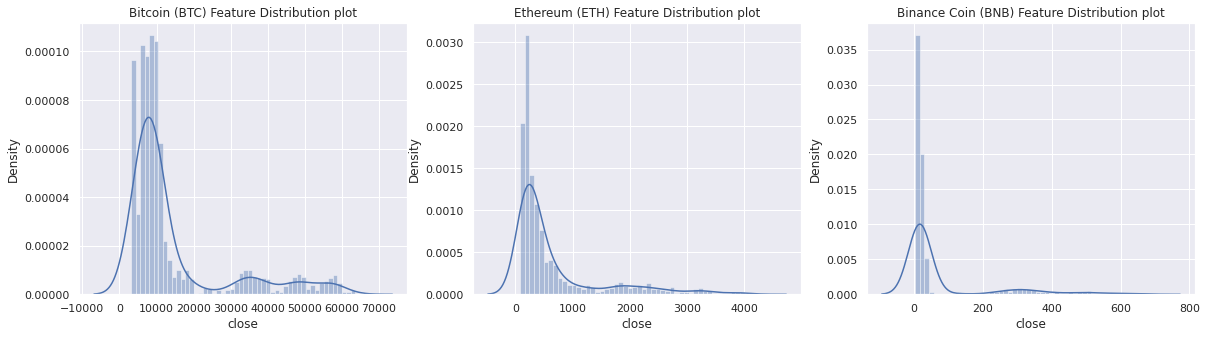

In [90]:
#Distribution plot for deciding imputation technique
#fig,ax = plt.subplots(10,8)
fig = plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
ax1 = sns.distplot(df1.close)
plt.title('Bitcoin (BTC) Feature Distribution plot')

plt.subplot(1,3,2)
ax2 = sns.distplot(df2.close)
plt.title('Ethereum (ETH) Feature Distribution plot')

plt.subplot(1,3,3)
ax3 = sns.distplot(df3.close)
plt.title('Binance Coin (BNB) Feature Distribution plot')


plt.show()

# fig.savefig('imputation.png')
# files.download('imputation.png')

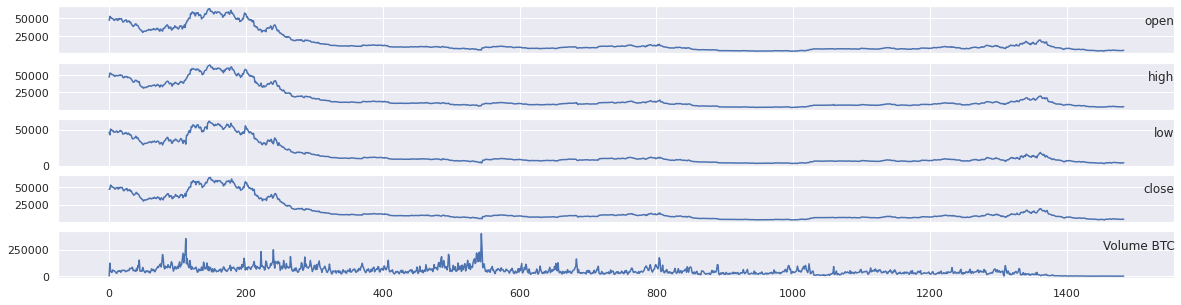

In [91]:
#CHECKING THE VALUE OF EACH FEATURE IN THE DATASET - BTC
#fig,ax = plt.subplots(10,8)
fig_btc_feat = plt.figure(figsize=(20,5))

val1 = df1.values
groups = [0, 1, 2, 3, 4]
i = 1
# to plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    ax_f1 = plt.plot(val1[:, group])
    plt.title(df1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()
fig_btc_feat.savefig('btc-features.png')
# files.download('features.png')

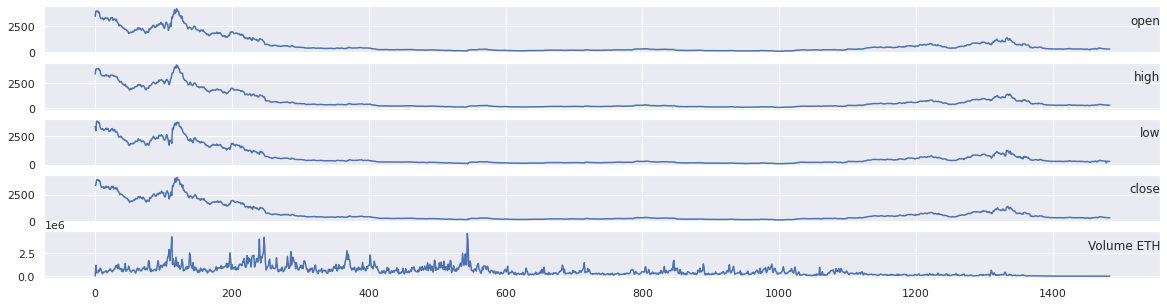

In [92]:
#CHECKING THE VALUE OF EACH FEATURE IN THE DATASET - ETH
#fig,ax = plt.subplots(10,8)
fig_eth_feat = plt.figure(figsize=(20,5))
val2 = df2.values
groups = [0, 1, 2, 3, 4]
i = 1
# to plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(val2[:, group])
    plt.title(df2.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

fig_eth_feat.savefig('eth-features.png')


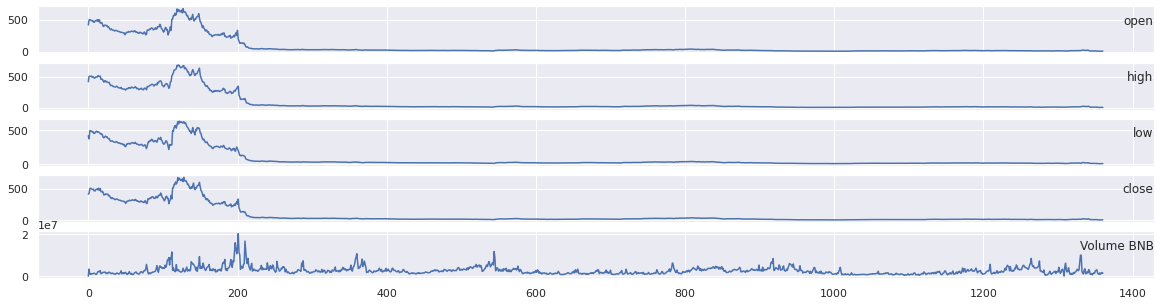

In [93]:
#CHECKING THE VALUE OF EACH FEATURE IN THE DATASET - BNB
#fig,ax = plt.subplots(10,8)
fig_bnb_feat = plt.figure(figsize=(20,5))
val3 = df3.values
groups = [0, 1, 2, 3, 4]
i = 1
# to plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(val3[:, group])
    plt.title(df3.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

fig_bnb_feat.savefig('bnb-features.png')

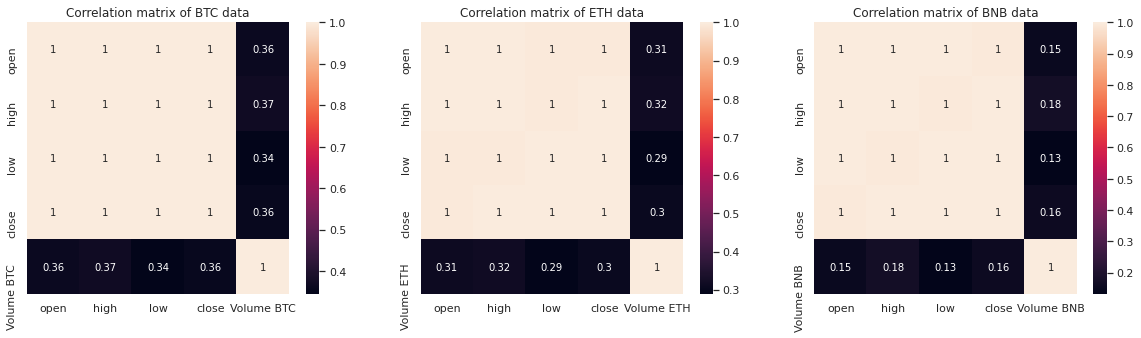

In [94]:
fig_corr = plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
correlation_btc = df1.corr()
sns.heatmap(correlation_btc, annot = True)

plt.title("Correlation matrix of BTC data")

plt.subplot(1,3,2)
correlation_eth = df2.corr()
sns.heatmap(correlation_eth, annot = True)

plt.title("Correlation matrix of ETH data")

plt.subplot(1,3,3)
correlation_bnb = df3.corr()
sns.heatmap(correlation_bnb, annot = True)

plt.title("Correlation matrix of BNB data")
plt.show()

fig_corr.savefig("crypto_correlation.png")
# files.download('crypto_correlation.png')

**Coefficient close to 1** meaning a +ve and robust association between the two

**Coefficient close to -1** meaning a strong -ve association between the two variables.

In [95]:
# #PAIRPLOT OF SELECTED VARIABLES 
# pair_plot = sns.pairplot(df1[['open', 'high', 'close']])
# pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05)

In [96]:
#finding the relationship between the closing price and other variables in the dataset
correlation = df1.corr()
correlation.sort_values(["close"])
correlation['close']

open          0.998101
high          0.999160
low           0.998902
close         1.000000
Volume BTC    0.358857
Name: close, dtype: float64

In [97]:
df1
# df2
# df3

open      high       low     close     Volume BTC
date                                                             
2021-09-08  46868.57  46989.28  46412.98  46576.37    1191.025750
2021-09-07  52666.20  52920.00  42843.05  46863.73  123048.802719
2021-09-06  51756.88  52780.00  50969.33  52663.90   49249.667081
2021-09-05  49917.54  51900.00  49450.00  51756.88   40544.835873
2021-09-04  49998.00  50535.69  49370.00  49915.64   34664.659590
...              ...       ...       ...       ...            ...
2017-08-21   4086.29   4119.62   3911.79   4016.00     685.120000
2017-08-20   4139.98   4211.08   4032.62   4086.29     463.540000
2017-08-19   4108.37   4184.69   3850.00   4139.98     371.150000
2017-08-18   4285.08   4371.52   3938.77   4108.37    1178.070000
2017-08-17   4469.93   4485.39   4200.74   4285.08     647.860000

[1484 rows x 5 columns]

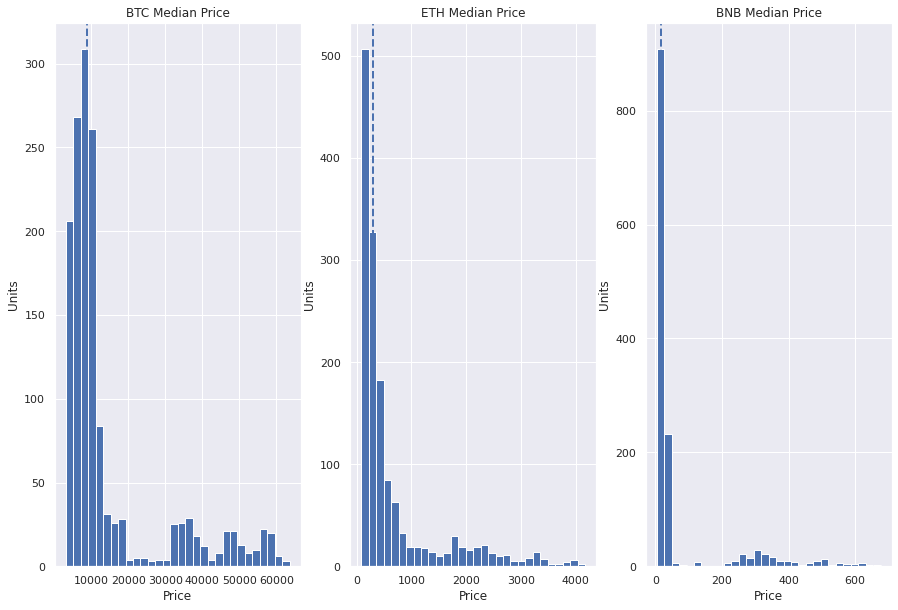

In [98]:
#median value for btc
fig_medbtc= plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
df['BTC'].hist(bins=30, figsize=(15,10)).axvline(df['BTC'].median(), color='b', linestyle='dashed', linewidth=2)
plt.title("BTC Median Price")
plt.xlabel('Price',fontsize=12)
plt.ylabel('Units',fontsize=12)


plt.subplot(1,3,2)
df['ETH'].hist(bins=30, figsize=(15,10)).axvline(df['ETH'].median(), color='b', linestyle='dashed', linewidth=2)
plt.title("ETH Median Price")
plt.xlabel('Price',fontsize=12)
plt.ylabel('Units',fontsize=12)

plt.subplot(1,3,3)
df['BNB'].hist(bins=30, figsize=(15,10)).axvline(df['BNB'].median(), color='b', linestyle='dashed', linewidth=2)
plt.title("BNB Median Price")
plt.xlabel('Price',fontsize=12)
plt.ylabel('Units',fontsize=12)


fig_medbtc.savefig('btcmed.png')
# files.download('btcmed.png')

The median plotted above corresponds to the right-skewed nature of the dataframes from the PDF plot above.


In [99]:
#Extracting Close of the three cryptocurrencies
df.loc[~df.index.duplicated(), :]

df = pd.DataFrame({'BTC': df1['close'],
                   'ETH': df2['close'],
                   'BNB': df3['close']})
df.head()
df.tail

<bound method NDFrame.tail of                  BTC      ETH    BNB
date                                
2017-08-17   4285.08   302.00    NaN
2017-08-18   4108.37   293.96    NaN
2017-08-19   4139.98   290.91    NaN
2017-08-20   4086.29   299.10    NaN
2017-08-21   4016.00   323.29    NaN
...              ...      ...    ...
2021-09-04  49915.64  3885.52  497.7
2021-09-05  51756.88  3950.29  504.8
2021-09-06  52663.90  3926.77  496.1
2021-09-07  46863.73  3434.57  418.7
2021-09-08  46576.37  3390.06  413.1

[1484 rows x 3 columns]>

In [100]:
# #REPLACING MISSING VALUES WITH MEDIAN 
df.fillna(df.median(), inplace=True)
# df.info()

In [101]:
#Extracting the relevant dates needed for the analyses as this url updates ever 24hours
df = df['2017-08-17':'2021-07-31']

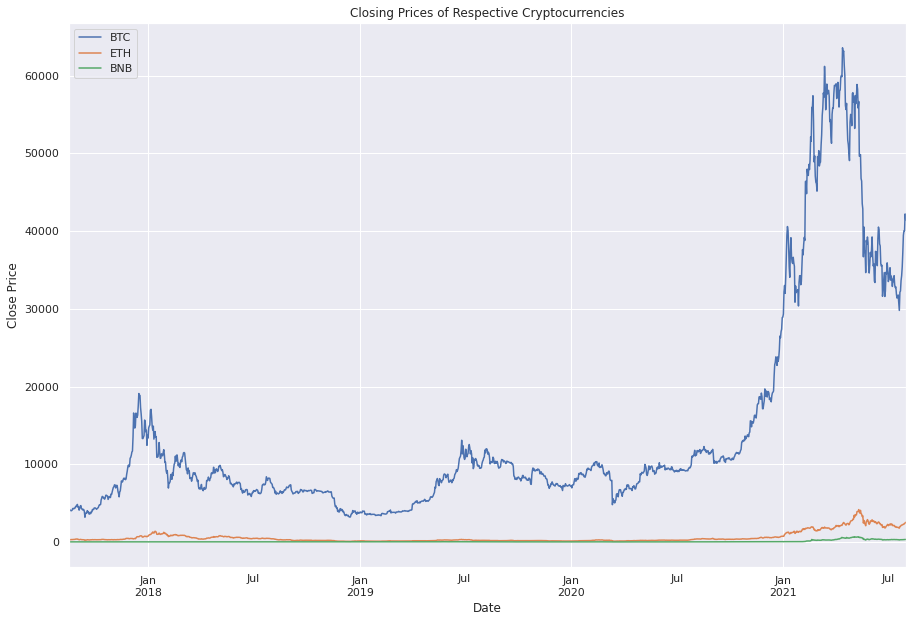

In [102]:
#Plotting the closing prices of respective cryptocurrencies
df.plot(grid=True, figsize=(15, 10))
plt.title("Closing Prices of Respective Cryptocurrencies")
plt.ylabel('Close Price')
plt.xlabel('Date')

plt.savefig('closingprice.png')
# files.download('closingprice.png')

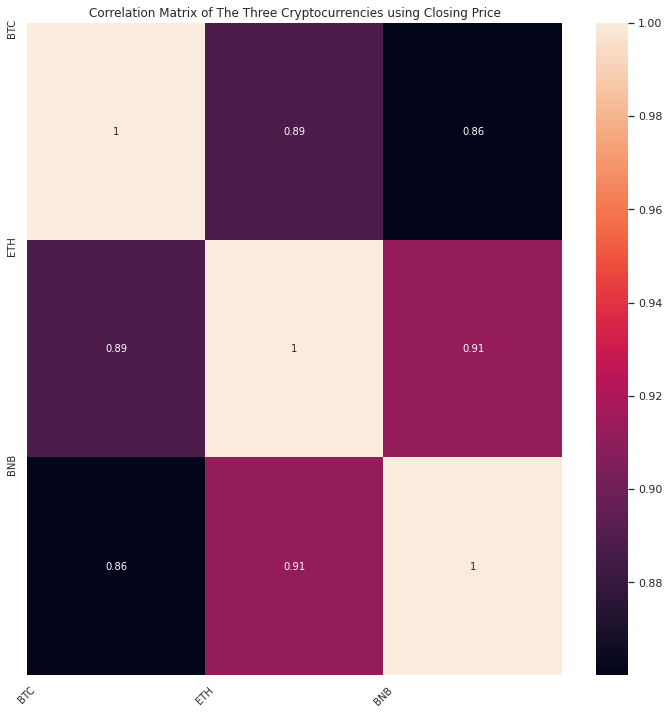

In [103]:
#CORRELATION PLOT 
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10,)
plt.title('Correlation Matrix of The Three Cryptocurrencies using Closing Price', fontsize=12);
plt.savefig('crypto-corr.png')
# files.download('crypto-corr.png')


**Buy and hold strategy**
Buy and hold is a passive investment strategy in which an investor buys a cryptocurrency and holds it for a long period, regardless of fluctuations in the market.
Analysing returns using the Buy and hold strategy for the past 2.7 months. We calculate the return percentage, where t represents a certain period and price0 is the initial closing price:


In [104]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()


BTC       ETH  BNB
date                               
2017-08-17  1.000000  1.000000  1.0
2017-08-18  0.958762  0.973377  1.0
2017-08-19  0.966138  0.963278  1.0
2017-08-20  0.953609  0.990397  1.0
2017-08-21  0.937205  1.070497  1.0

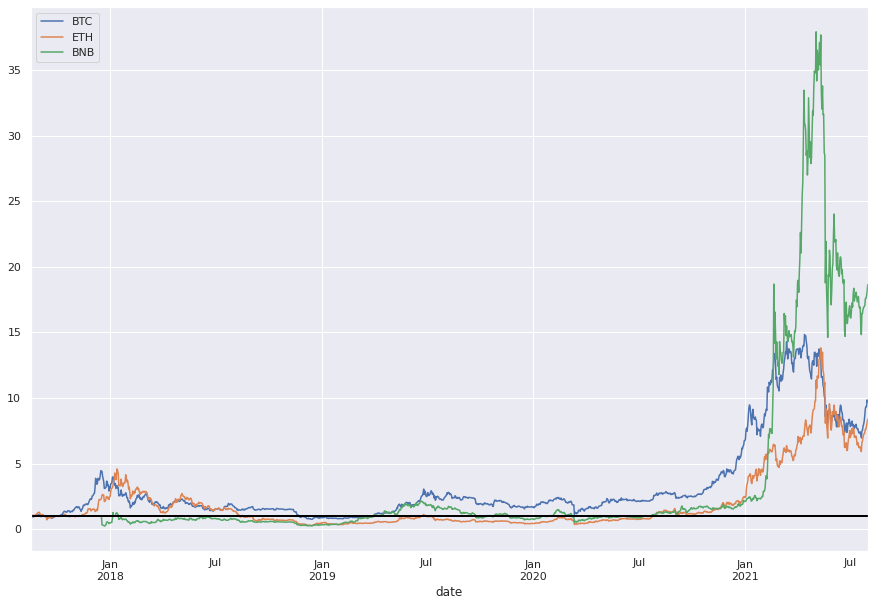

In [105]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)


An important metric for understanding stock price movements is return. **Return** is defined as the opening price minus the closing pricedivided by the opening price 

(R = [open-close]/open).

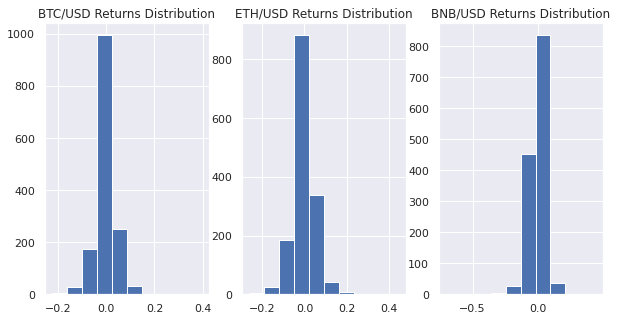

In [106]:
fig_r = plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
df1['Returns'] = (df1['open'] - df1['close'])/df1['open']
df1['Returns'].hist()
plt.title('BTC/USD Returns Distribution')

plt.subplot(1,3,2)
df2['Returns'] = (df2['open'] - df2['close'])/df2['open']
df2['Returns'].hist()
plt.title('ETH/USD Returns Distribution')

plt.subplot(1,3,3)
df3['Returns'] = (df3['open'] - df3['close'])/df3['open']
df3['Returns'].hist()
plt.title('BNB/USD Returns Distribution')


plt.show()
# fig_r.savefig('returns.png')
# files.download('returns.png')

We can also calculate the mean returns and the standard deviation in returns for each stock and display them in the title of the histogram. These statistics are very important for investors. 
**Mean returns** give us an understanding of a stock investment’s profitability. 
The **standard deviation** is a measure of how much the returns fluctuate. We call this risk in the financial world.

In [107]:
df1['Currency'] = 'BTC/USD'
df2['Currency'] = 'ETH/USD'
df3['Currency'] = 'BNB/USD'
RET_df = pd.concat([df1, df2, df3])
RET_df = RET_df[['Currency', 'Returns']]
print(RET_df.head())

           Currency   Returns
date                         
2021-09-08  BTC/USD  0.006234
2021-09-07  BTC/USD  0.110174
2021-09-06  BTC/USD -0.017525
2021-09-05  BTC/USD -0.036848
2021-09-04  BTC/USD  0.001647


In [108]:
# #To get Minimum and Maximum Returns for BTC

# column1_min = df1['Returns']
# min1_value = column1_min.min()
# print(min1_value)

# column1_max = df1['Returns']
# max1_value = column1_max.max()
# print(max1_value)

# #To get Minimum and Maximum Returns for ETH
# column2_min = df2['Returns']
# min2_value = column2_min.min()
# print(min2_value)

# column2_max = df2['Returns']
# max2_value = column2_max.max()
# print(max2_value)

# #To get Minimum and Maximum Returns for BNB
# column3_min = df3['Returns']
# min3_value = column3_min.min()
# print(min3_value)

# column3_max = df3['Returns']
# max3_value = column3_max.max()
# print(max3_value)

column3_med = df2['Returns']
med3_value = column3_med.median()
print(med3_value)

-0.001531229920855103


In [109]:
RET_df
column = RET_df['Returns']
max_value = column.max()
print(max_value)

0.4459688607985202


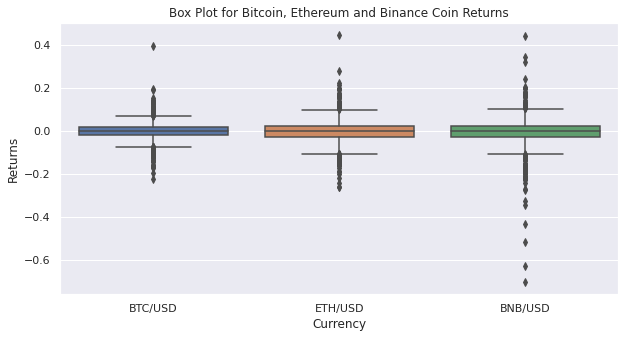

In [110]:
#Boxplot showing the returns for the three cryptocurrencies
fig_b = plt.figure(figsize=(10,5))
sns.boxplot(x= RET_df['Currency'], y = RET_df['Returns'])
plt.title('Box Plot for Bitcoin, Ethereum and Binance Coin Returns')
plt.show()
# fig_b.savefig('boxplot.png')
# files.download('boxplot.png')

CALCULATING RETURNS (LOG AND SIMPLE FOR BTC, ETH & BNB)

In [111]:
#Log and Simple Return for BTC 
df_ret = df1.loc[:, ['close']]
df_ret.rename(columns={'close':'close'}, inplace=True)
df_ret['simple_rtn'] = df_ret.close.pct_change()
df_ret['log_rtn'] = np.log(df_ret.close/df_ret.close.shift(1))
# df_ret

#Log and Simple Return for ETH 
df_ret2 = df2.loc[:, ['close']]
df_ret2.rename(columns={'close':'close'}, inplace=True)
df_ret2['simple_rtn'] = df_ret2.close.pct_change()
df_ret2['log_rtn'] = np.log(df_ret2.close/df_ret2.close.shift(1))
# df_ret2

#Log and Simple Return for ETH 
df_ret3 = df3.loc[:, ['close']]
df_ret3.rename(columns={'close':'close'}, inplace=True)
df_ret3['simple_rtn'] = df_ret3.close.pct_change()
df_ret3['log_rtn'] = np.log(df_ret3.close/df_ret3.close.shift(1))
# df_ret3

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

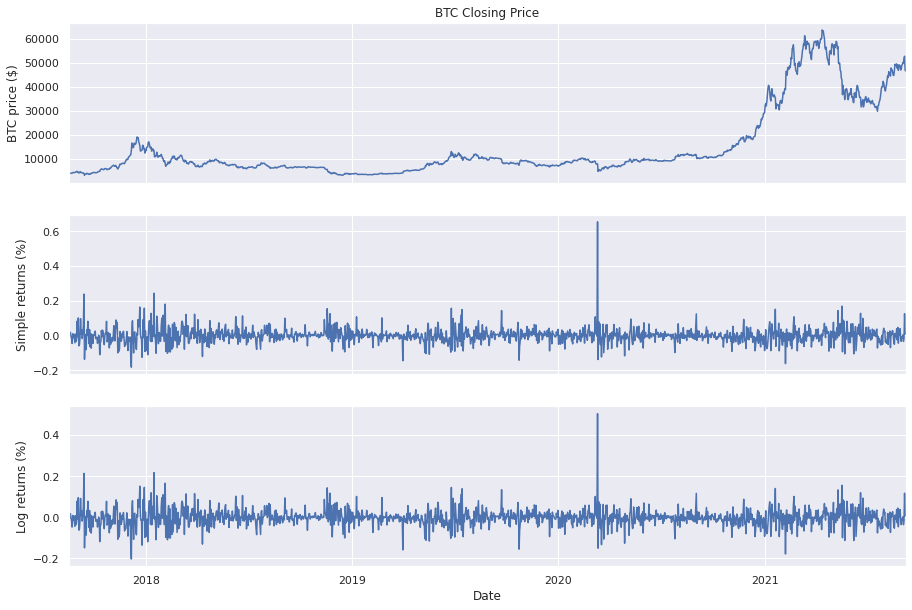

In [112]:
# #Plot graph to show raw prices, simple returns, and log returns for BTC 
# #This plot enables us to see the periods of heightened volatility alongside similarity between simple and log returns.

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

df_ret.close.plot(ax=ax[0])
ax[0].set(title = 'BTC Closing Price',
ylabel = 'BTC price ($)')

df_ret.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

df_ret.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
ylabel = 'Log returns (%)')

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

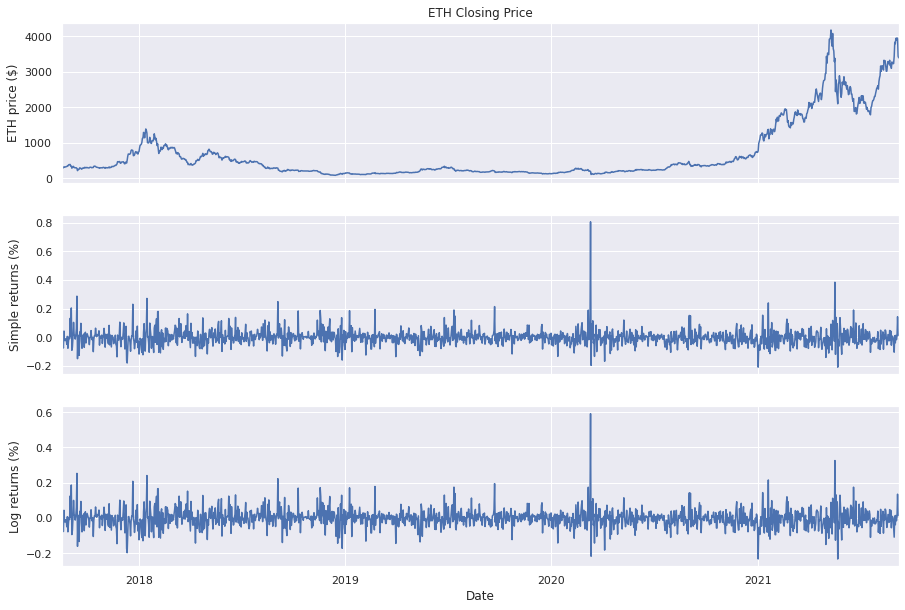

In [113]:
# #Plot graph to show raw prices, simple returns, and log returns for ETH 
# #This plot enables us to see the periods of heightened volatility alongside similarity between simple and log returns.

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

df_ret2.close.plot(ax=ax[0])
ax[0].set(title = 'ETH Closing Price',
ylabel = 'ETH price ($)')

df_ret2.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

df_ret2.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
ylabel = 'Log returns (%)')

[Text(0, 0.5, 'Log returns (%)'), Text(0.5, 0, 'Date')]

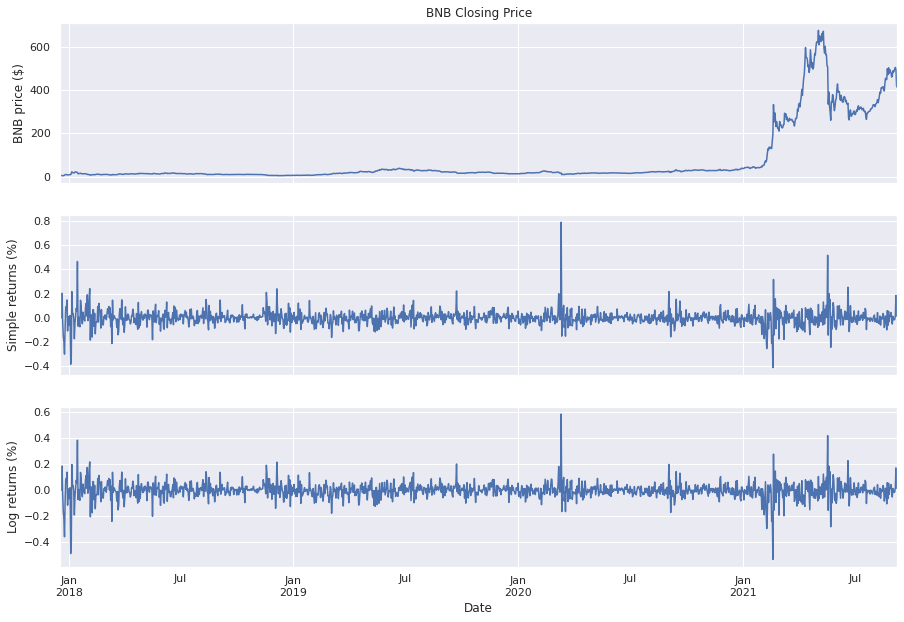

In [114]:
# #Plot graph to show raw prices, simple returns, and log returns for BNB
# #This plot enables us to see the periods of heightened volatility alongside similarity between simple and log returns.

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

df_ret3.close.plot(ax=ax[0])
ax[0].set(title = 'BNB Closing Price',
ylabel = 'BNB price ($)')

df_ret3.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

df_ret3.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
ylabel = 'Log returns (%)')

Checking for outliers

In [115]:
# #To calculate the rolling mean and standard deviation:
#BTC
df_ret_rolling = df_ret[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])
df_ret_rolling.columns = df_ret_rolling.columns.droplevel()

#ETH
df_ret_rolling2 = df_ret2[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])
df_ret_rolling2.columns = df_ret_rolling2.columns.droplevel()

#ETH
df_ret_rolling3 = df_ret3[['simple_rtn']].rolling(window=21) \
.agg(['mean', 'std'])
df_ret_rolling3.columns = df_ret_rolling3.columns.droplevel()

#To join the rolling metrics to the original data:
#BTC
df_ret_outliers = df_ret.join(df_ret_rolling)

#ETH
df_ret_outliers2 = df_ret2.join(df_ret_rolling2)

#BNB
df_ret_outliers3 = df_ret3.join(df_ret_rolling3)

In [116]:
# #To define a function which detects the outliers:
#BTC
def indentify_outliers(row, n_sigmas=3):
  x = row['simple_rtn']
  mu = row['mean']
  sigma = row['std']

  if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
    return 1
  else:
    return 0

In [117]:
# #To define a function which detects the outliers:
#ETH
def indentify_outliers2(row2, n_sigmas_eth=3):
  x2 = row2['simple_rtn']
  mu2 = row2['mean']
  sigma2 = row2['std']

  if (x2 > mu2 + 3 * sigma2) | (x2 < mu2 - 3 * sigma2):
    return 1
  else:
    return 0

In [118]:
# #To define a function which detects the outliers:
#BNB
def indentify_outliers3(row3, n_sigmas_bnb=3):
  x3 = row3['simple_rtn']
  mu3 = row3['mean']
  sigma3 = row3['std']

  if (x3 > mu3 + 3 * sigma3) | (x3 < mu3 - 3 * sigma3):
    return 1
  else:
    return 0

In [119]:
# #Identifying and extracting outlier values
#BTC
df_ret_outliers['outlier'] = df_ret_outliers.apply(indentify_outliers, 
axis=1) 
outliers = df_ret_outliers.loc[df_ret_outliers['outlier'] == 1, 
['simple_rtn']]

#ETH
df_ret_outliers2['outlier'] = df_ret_outliers2.apply(indentify_outliers2, 
axis=1) 
outliers2 = df_ret_outliers2.loc[df_ret_outliers2['outlier'] == 1, 
['simple_rtn']]

#BNB
df_ret_outliers3['outlier'] = df_ret_outliers3.apply(indentify_outliers3, 
axis=1) 
outliers3 = df_ret_outliers3.loc[df_ret_outliers3['outlier'] == 1, 
['simple_rtn']]

In [120]:
#To get minimum and maximum outlier values
#BTC
column1_min = df_ret['simple_rtn']
min1_value = column1_min.min()
print(min1_value)

column1_max = df_ret['simple_rtn']
max1_value = column1_max.max()
print(max1_value)

-0.18368275197301043
0.6530250000000002


In [121]:
#To get minimum and maximum outlier values
#ETH
column2_min = df_ret2['simple_rtn']
min2_value = column2_min.min()
print(min2_value)

column2_max = df_ret2['simple_rtn']
max2_value = column2_max.max()
print(max2_value)

-0.20844047227980356
0.8049526989426825


In [122]:
#To get minimum and maximum outlier values
#BNB
column3_min = df_ret3['simple_rtn']
min3_value = column3_min.min()
print(min3_value)

column3_max = df_ret3['simple_rtn']
max3_value = column3_max.max()
print(max3_value)

-0.412808343164891
0.7901281247974417


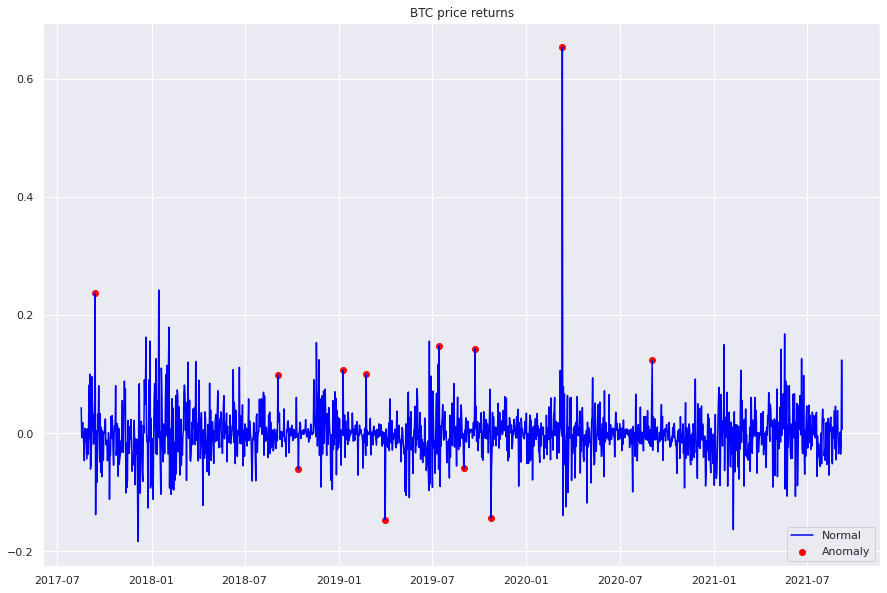

In [123]:
# #Plot to identify outliers 
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_ret_outliers.index, df_ret_outliers.simple_rtn, 
color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
color='red', label='Anomaly')
ax.set_title("BTC price returns")
ax.legend(loc='lower right')

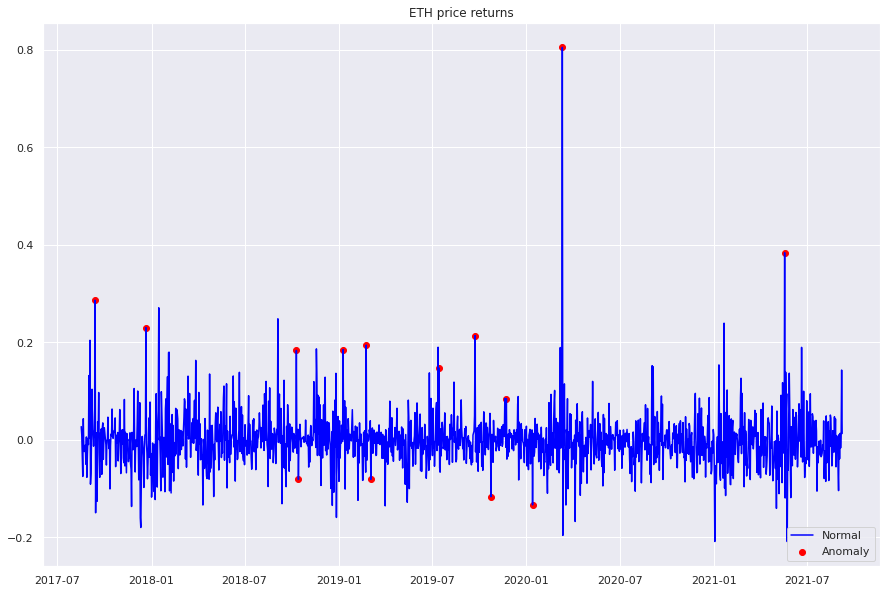

In [124]:
# #Plot to identify outliers - ETH
fig, ax2 = plt.subplots(figsize=(15, 10))
ax2.plot(df_ret_outliers2.index, df_ret_outliers2.simple_rtn, 
color='blue', label='Normal')
ax2.scatter(outliers2.index, outliers2.simple_rtn, 
color='red', label='Anomaly')
ax2.set_title("ETH price returns")
ax2.legend(loc='lower right')

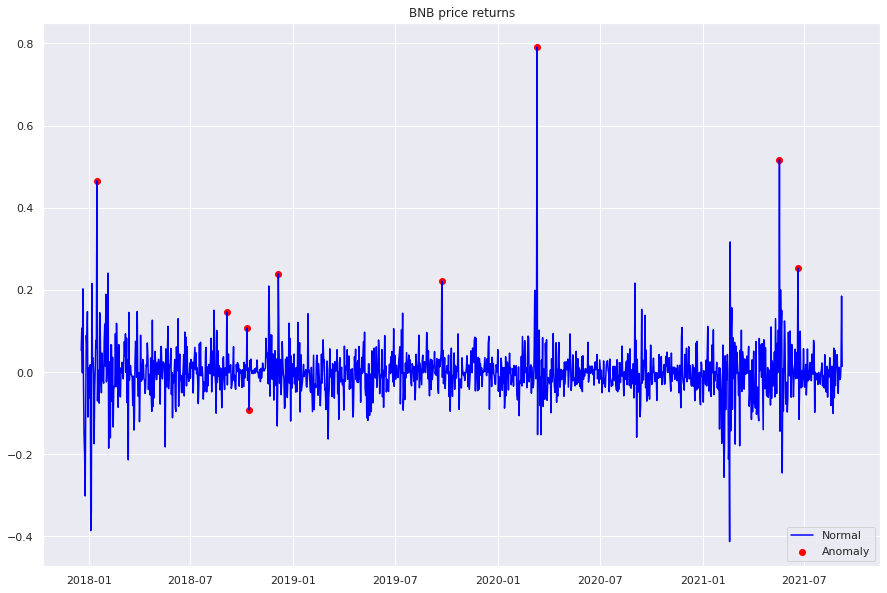

In [125]:
# #Plot to identify outliers - BNB
fig, ax3 = plt.subplots(figsize=(15, 10))
ax3.plot(df_ret_outliers3.index, df_ret_outliers3.simple_rtn, 
color='blue', label='Normal')
ax3.scatter(outliers3.index, outliers3.simple_rtn, 
color='red', label='Anomaly')
ax3.set_title("BNB price returns")
ax3.legend(loc='lower right')

Non-Gaussian distribution of returns -  Normal Probability Density Function (PDF) 

In [126]:
df_pdf = df_ret.fillna(0)
# df_pdf

df_pdf2 = df_ret2.fillna(0)
# df_pdf

df_pdf3 = df_ret3.fillna(0)
# df_pdf3

Text(0.5, 1.0, 'Q-Q plot')

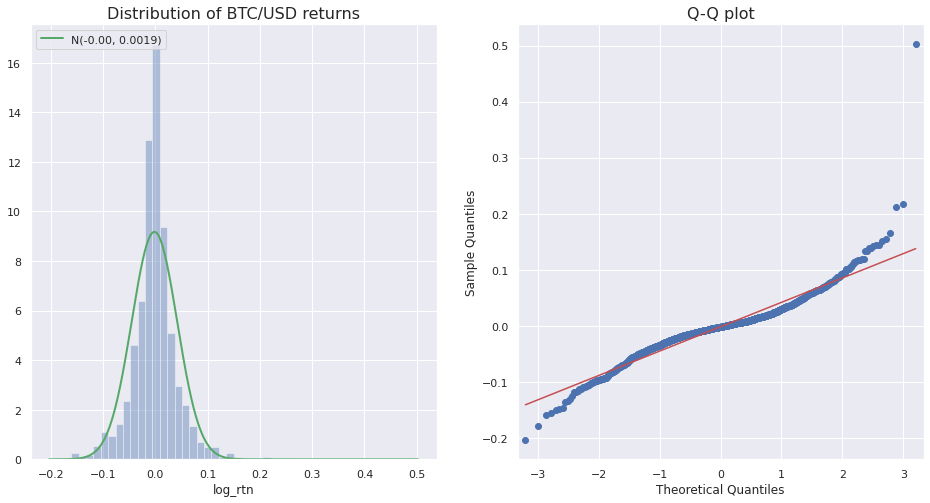

In [127]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns:
r_range = np.linspace(df_pdf.log_rtn.min(), df_pdf.log_rtn.max(), num=1000)
mu = df_pdf.log_rtn.mean()
sigma = df_pdf.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df_pdf.log_rtn, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribution of BTC/USD returns', fontsize=16) 
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df_pdf.log_rtn, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

Text(0.5, 1.0, 'Q-Q plot')

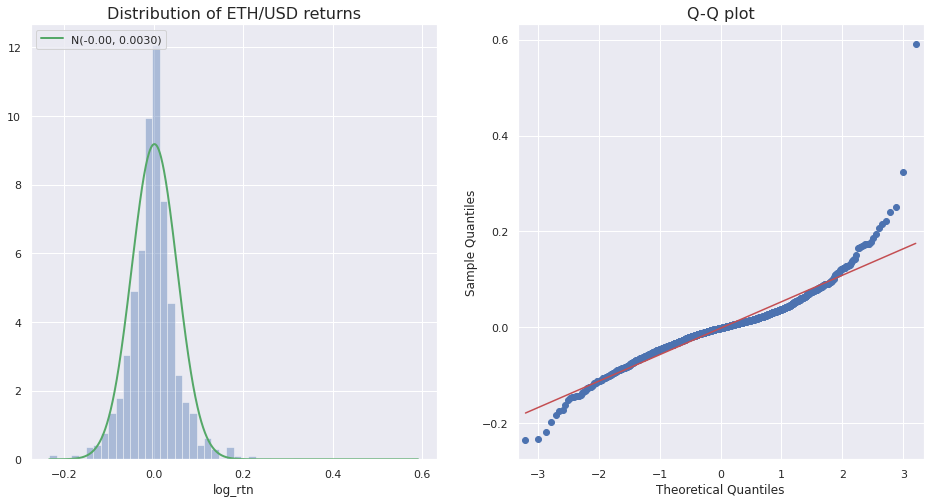

In [128]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns:
#ETH
r_range2 = np.linspace(df_pdf2.log_rtn.min(), df_pdf2.log_rtn.max(), num=1000)
mu2 = df_pdf2.log_rtn.mean()
sigma2 = df_pdf2.log_rtn.std()
norm_pdf2 = scs.norm.pdf(r_range2, loc=mu2, scale=sigma2)

fig, ax2 = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df_pdf2.log_rtn, kde=False, norm_hist=True, ax=ax2[0]) 
ax2[0].set_title('Distribution of ETH/USD returns', fontsize=16) 
ax2[0].plot(r_range2, norm_pdf, 'g', lw=2, 
label=f'N({mu2:.2f}, {sigma2**2:.4f})')
ax2[0].legend(loc='upper left');

# Q-Q plot
qq2 = sm.qqplot(df_pdf2.log_rtn, line='s', ax=ax2[1])
ax2[1].set_title('Q-Q plot', fontsize = 16)

Text(0.5, 1.0, 'Q-Q plot')

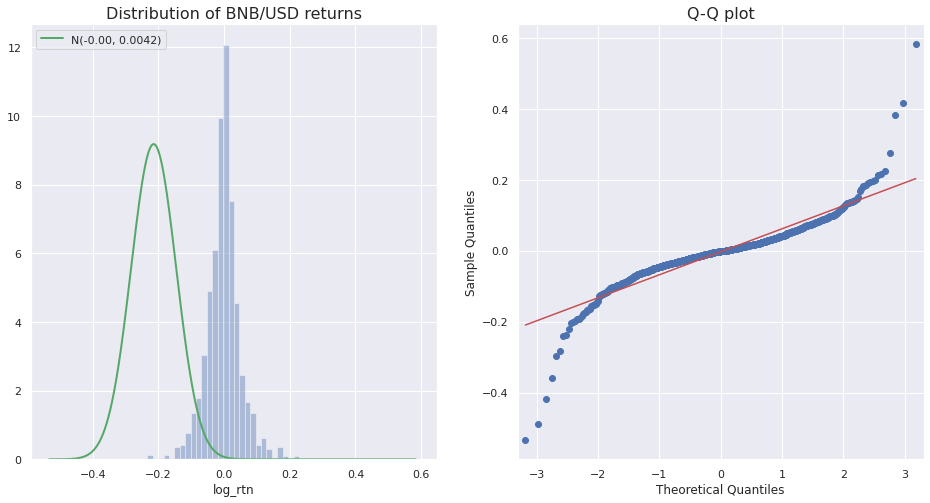

In [129]:
#Calculate the normal Probability Density Function (PDF) using the mean and standard deviation of the observed returns:
#BNB
r_range3 = np.linspace(df_pdf3.log_rtn.min(), df_pdf3.log_rtn.max(), num=1000)
mu3 = df_pdf3.log_rtn.mean()
sigma3 = df_pdf3.log_rtn.std()
norm_pdf3 = scs.norm.pdf(r_range3, loc=mu3, scale=sigma3)

fig, ax3 = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df_pdf2.log_rtn, kde=False, norm_hist=True, ax=ax3[0]) 
ax3[0].set_title('Distribution of BNB/USD returns', fontsize=16) 
ax3[0].plot(r_range3, norm_pdf, 'g', lw=2, 
label=f'N({mu3:.2f}, {sigma3**2:.4f})')
ax3[0].legend(loc='upper left');

# Q-Q plot
qq3 = sm.qqplot(df_pdf3.log_rtn, line='s', ax=ax3[1])
ax3[1].set_title('Q-Q plot', fontsize = 16)

<Figure size 720x360 with 0 Axes>

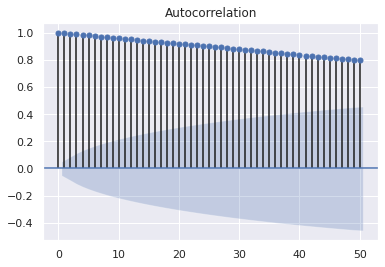

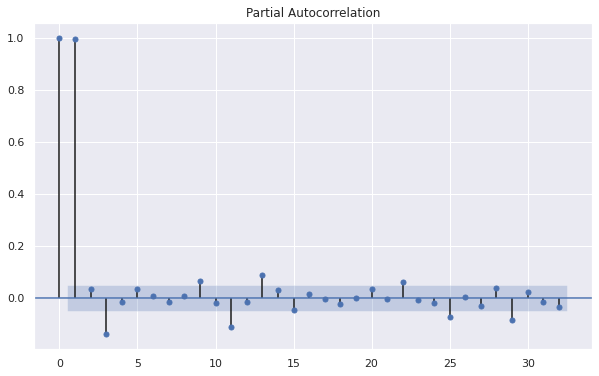

In [130]:
# #Check variable autocorrelation 
#BTC
plt.figure(figsize=(10,5))
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_pdf['close'], lags=50);

plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df_pdf['close']);

The above shows that that our data has a very high correlation after setting the number of lags "k" to 50

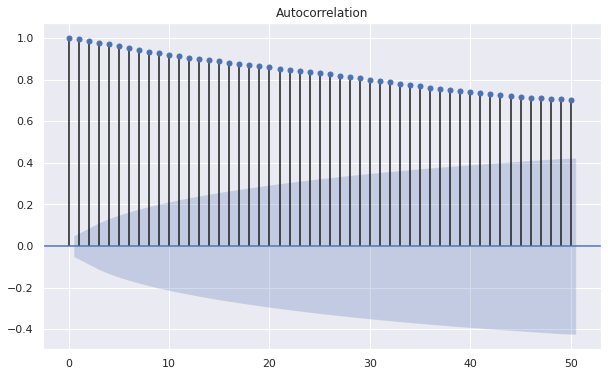

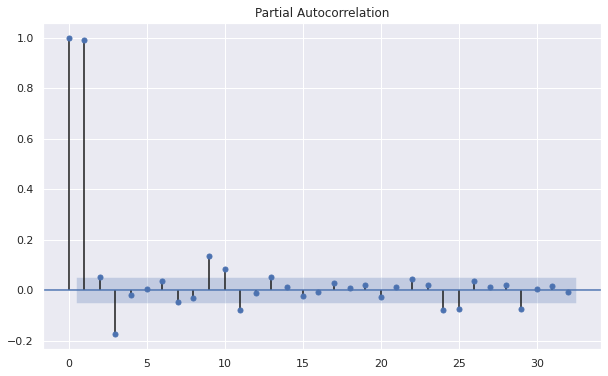

In [131]:
#ETH
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_pdf2['close'], lags=50);

plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df_pdf2['close']);

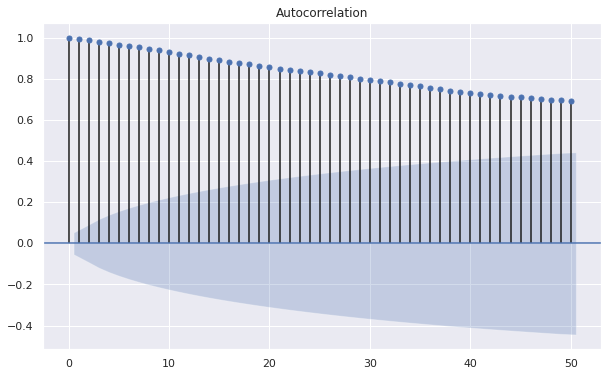

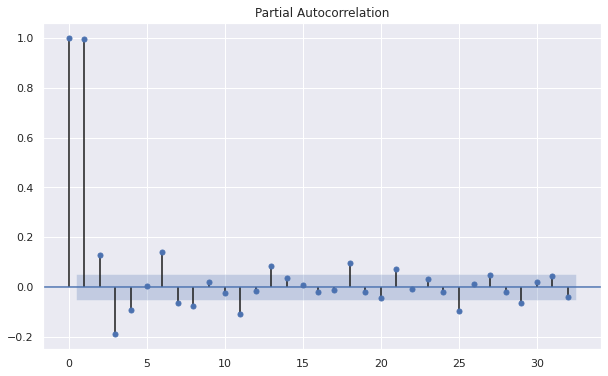

In [132]:
#BNB
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_pdf3['close'], lags=50);

plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(df_pdf3['close']);

**SEASONALITY**

In [133]:
season1 = df1[['close']]
season2 = df2[['close']]
season3 = df3[['close']]
# season2

In [134]:
df1

open      high       low  ...     Volume BTC   Returns  Currency
date                                      ...                                   
2021-09-08  46868.57  46989.28  46412.98  ...    1191.025750  0.006234   BTC/USD
2021-09-07  52666.20  52920.00  42843.05  ...  123048.802719  0.110174   BTC/USD
2021-09-06  51756.88  52780.00  50969.33  ...   49249.667081 -0.017525   BTC/USD
2021-09-05  49917.54  51900.00  49450.00  ...   40544.835873 -0.036848   BTC/USD
2021-09-04  49998.00  50535.69  49370.00  ...   34664.659590  0.001647   BTC/USD
...              ...       ...       ...  ...            ...       ...       ...
2017-08-21   4086.29   4119.62   3911.79  ...     685.120000  0.017201   BTC/USD
2017-08-20   4139.98   4211.08   4032.62  ...     463.540000  0.012969   BTC/USD
2017-08-19   4108.37   4184.69   3850.00  ...     371.150000 -0.007694   BTC/USD
2017-08-18   4285.08   4371.52   3938.77  ...    1178.070000  0.041238   BTC/USD
2017-08-17   4469.93   4485.39   4200.74  ...     647.860000  0.041354   BTC/USD

[1484 rows x 7 columns]

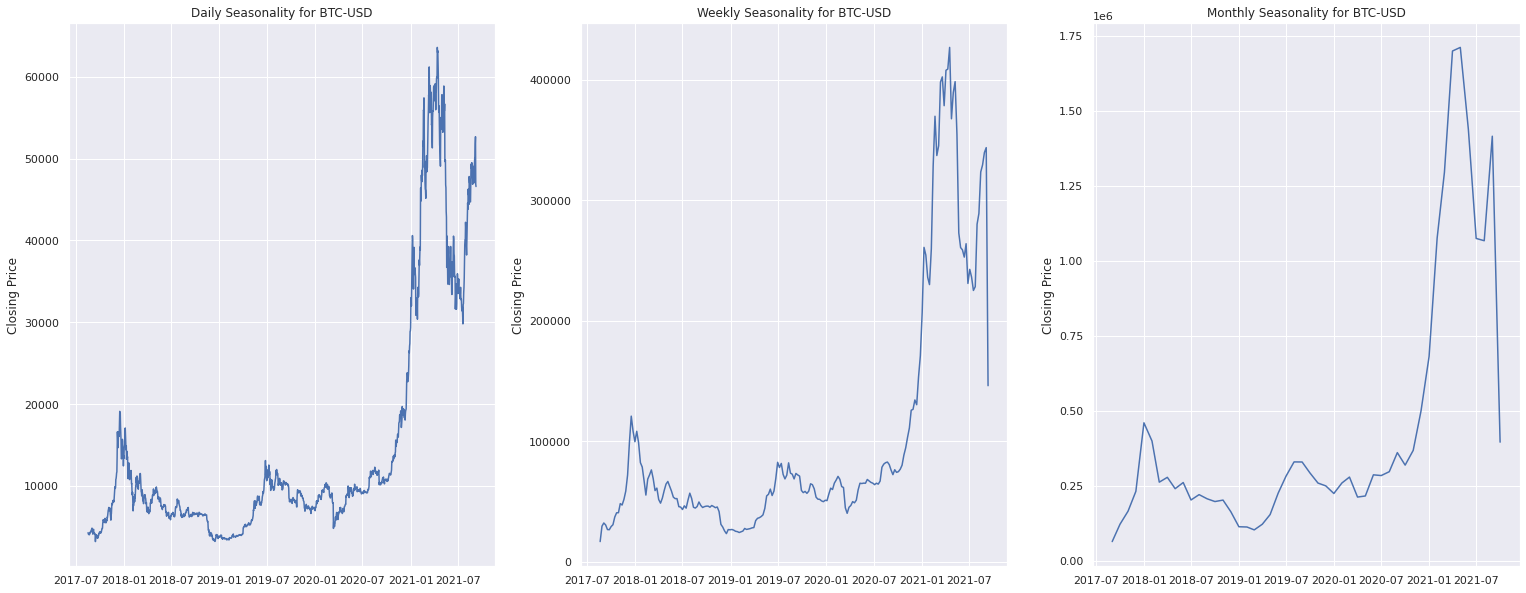

In [135]:
#Check Daily, Weekly and Monthly Seasonality of Bitcoin.
fig_season1 = plt.figure(figsize=(26, 10))
plt.subplot(1,3,1)
ts_daily1 = season1.resample('D').apply('sum')
#print(ts_weekly)
# ts_daily.plot()
plt.plot(ts_daily1)
plt.title("Daily Seasonality for BTC-USD")
plt.ylabel('Closing Price')

plt.subplot(1,3,2)
ts_weekly1 = season1.resample('W').apply('sum')
#print(ts_weekly)
# ts_weekly.plot()
plt.plot(ts_weekly1)
plt.title("Weekly Seasonality for BTC-USD")
plt.ylabel('Closing Price')

plt.subplot(1,3,3)
ts_monthly1 = season1.resample('M').apply('sum')
#print(ts_weekly)
# ts_monthly.plot()
plt.plot(ts_monthly1)
plt.title("Monthly Seasonality for BTC-USD")
plt.ylabel('Closing Price')
# plt.show()
fig_season1.savefig('seasonalitybtc.png')


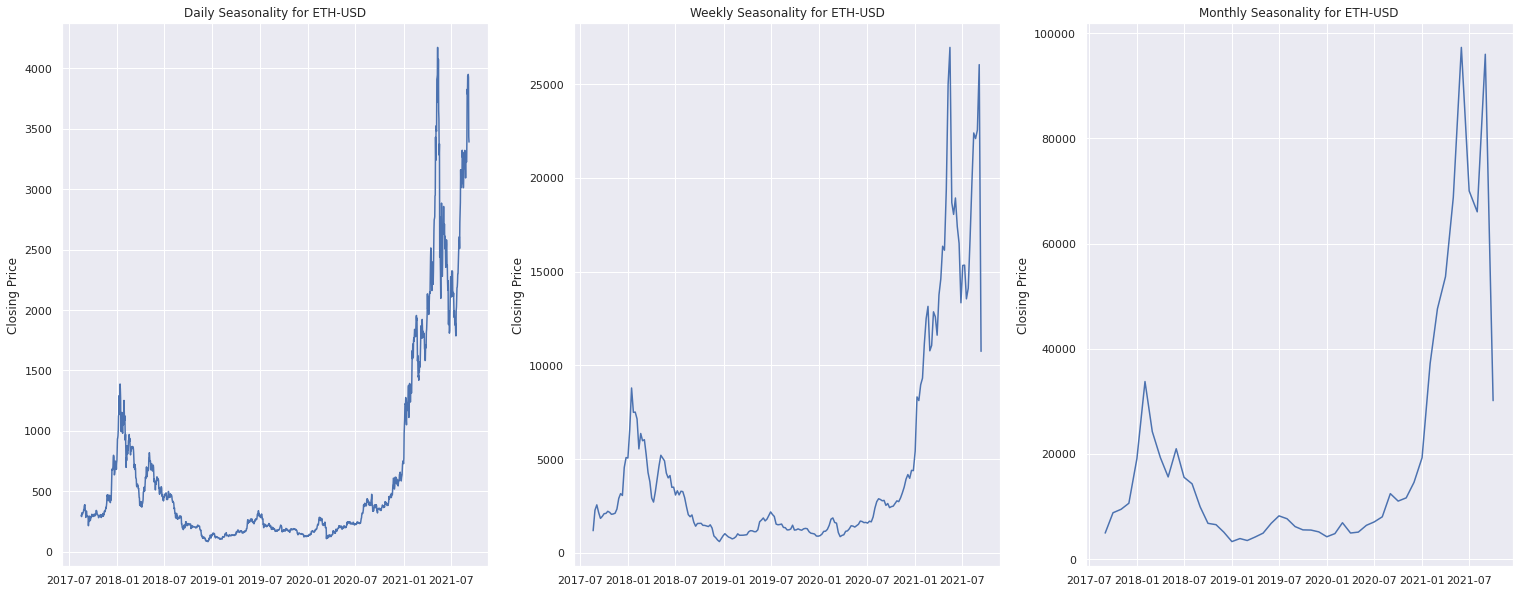

In [136]:
#Check Daily, Weekly and Monthly Seasonality of Ethereum.
fig_season2 = plt.figure(figsize=(26, 10))
plt.subplot(1,3,1)
ts_daily2 = season2.resample('D').apply('sum')
#print(ts_weekly)
# ts_daily.plot()
plt.plot(ts_daily2)
plt.title("Daily Seasonality for ETH-USD")
plt.ylabel('Closing Price')

plt.subplot(1,3,2)
ts_weekly2 = season2.resample('W').apply('sum')
#print(ts_weekly)
# ts_weekly.plot()
plt.plot(ts_weekly2)
plt.title("Weekly Seasonality for ETH-USD")
plt.ylabel('Closing Price')

plt.subplot(1,3,3)
ts_monthly2 = season2.resample('M').apply('sum')
#print(ts_weekly)
# ts_monthly.plot()
plt.plot(ts_monthly2)
plt.title("Monthly Seasonality for ETH-USD")
plt.ylabel('Closing Price')
# plt.show()
fig_season2.savefig('seasonalityeth.png')


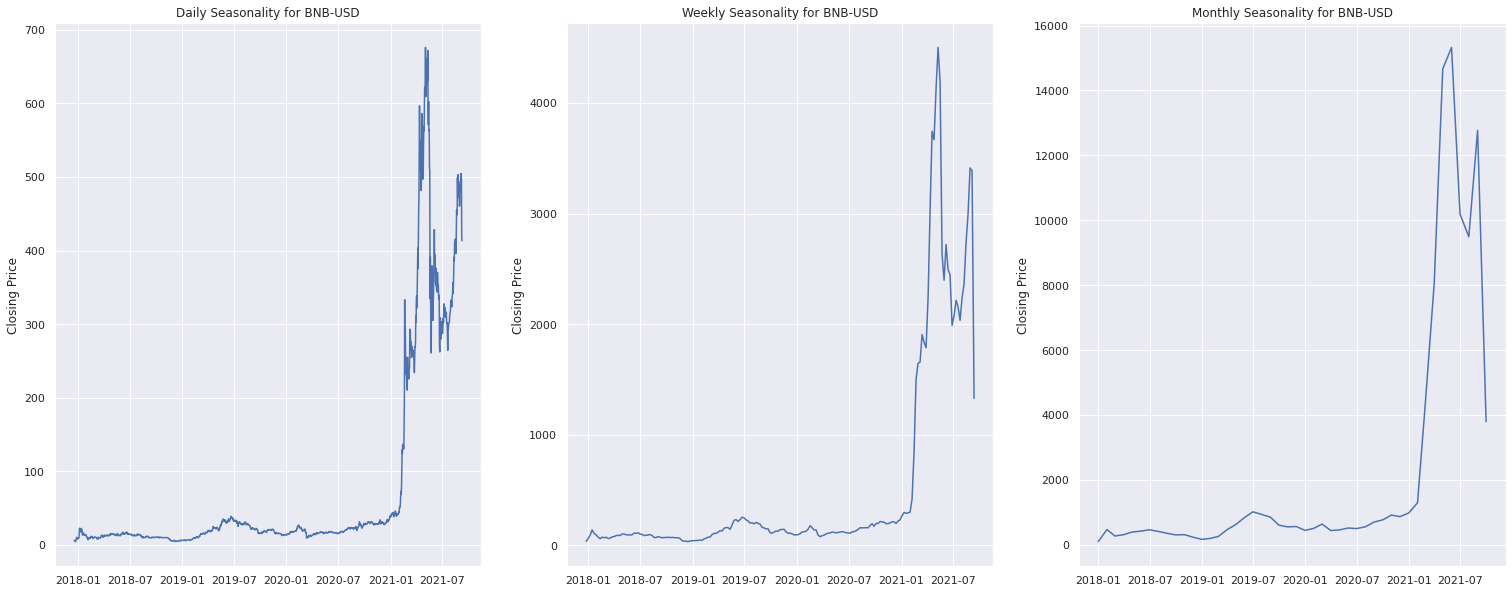

In [137]:
#Check Daily, Weekly and Monthly Seasonality of Binance Coin.
fig_season3 = plt.figure(figsize=(26, 10))
plt.subplot(1,3,1)
ts_daily3 = season3.resample('D').apply('sum')
#print(ts_weekly)
# ts_daily.plot()
plt.plot(ts_daily3)
plt.title("Daily Seasonality for BNB-USD")
plt.ylabel('Closing Price')

plt.subplot(1,3,2)
ts_weekly3 = season3.resample('W').apply('sum')
#print(ts_weekly)
# ts_weekly.plot()
plt.plot(ts_weekly3)
plt.title("Weekly Seasonality for BNB-USD")
plt.ylabel('Closing Price')

plt.subplot(1,3,3)
ts_monthly3 = season3.resample('M').apply('sum')
#print(ts_weekly)
# ts_monthly.plot()
plt.plot(ts_monthly3)
plt.title("Monthly Seasonality for BNB-USD")
plt.ylabel('Closing Price')
# plt.show()
fig_season3.savefig('seasonalitybnb.png')


**MULTIPLICATIVE MODEL**

A multiplicative model suggests that the components are multiplied together as follows:


1
y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.



In [138]:
# from google.colab import drive
# drive.mount('/content/drive')

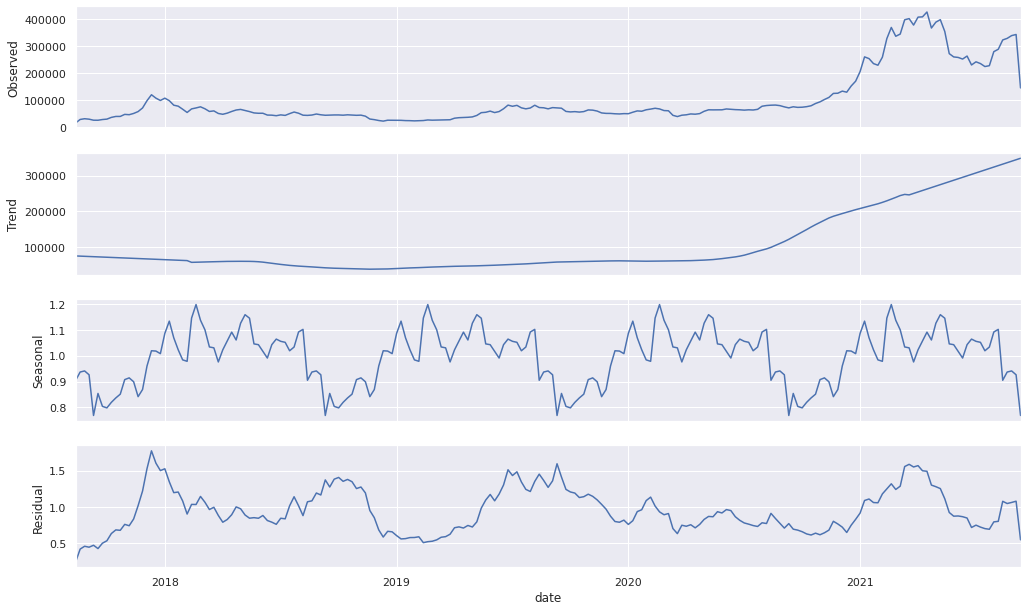

<Figure size 720x432 with 0 Axes>

In [139]:
#MULTIPLICATIVE MODEL ON BTC's WEEKLY SEASONALITY
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonaldecompose(data_btc):
  Decomposition = sm.tsa.seasonal_decompose (data_btc, model='multiplicative',extrapolate_trend= 'freq')
  Figure = Decomposition.plot()
  Figure.set_size_inches(15,9)
  plt.show()


seasonaldecompose(ts_weekly1)
plt.savefig('multiplicativebtc.png')

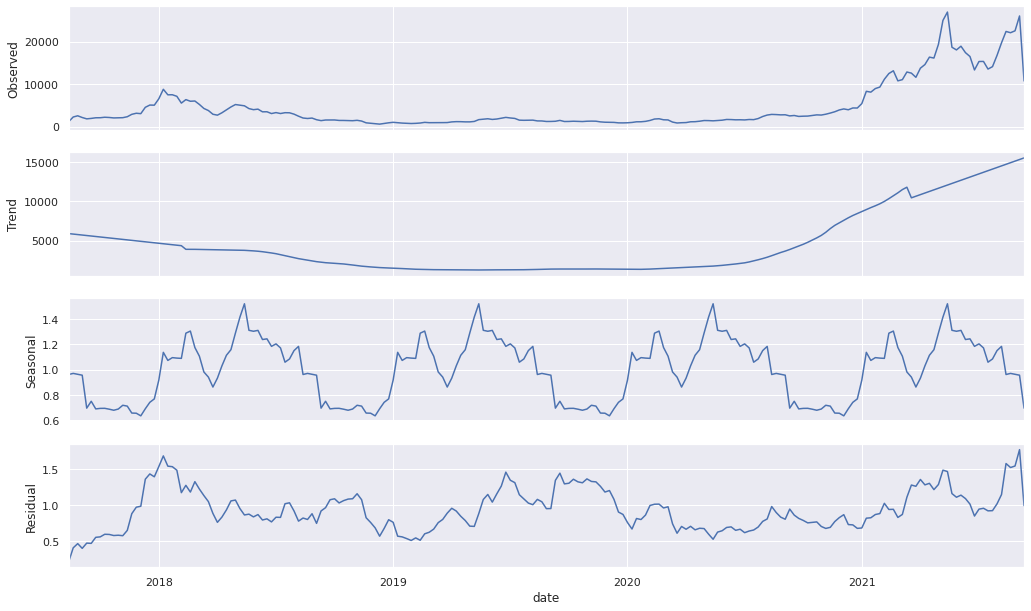

<Figure size 720x432 with 0 Axes>

In [140]:
#MULTIPLICATIVE MODEL ON ETH WEEKLY SEASONALITY
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonaldecompose(data_eth):
  Decomposition_eth = sm.tsa.seasonal_decompose(data_eth, model='multiplicative',extrapolate_trend= 'freq')
  Figure_eth = Decomposition_eth.plot()
  Figure_eth.set_size_inches(15,9)
  plt.show()


seasonaldecompose(ts_weekly2)
plt.savefig('multiplicativeeth.png')

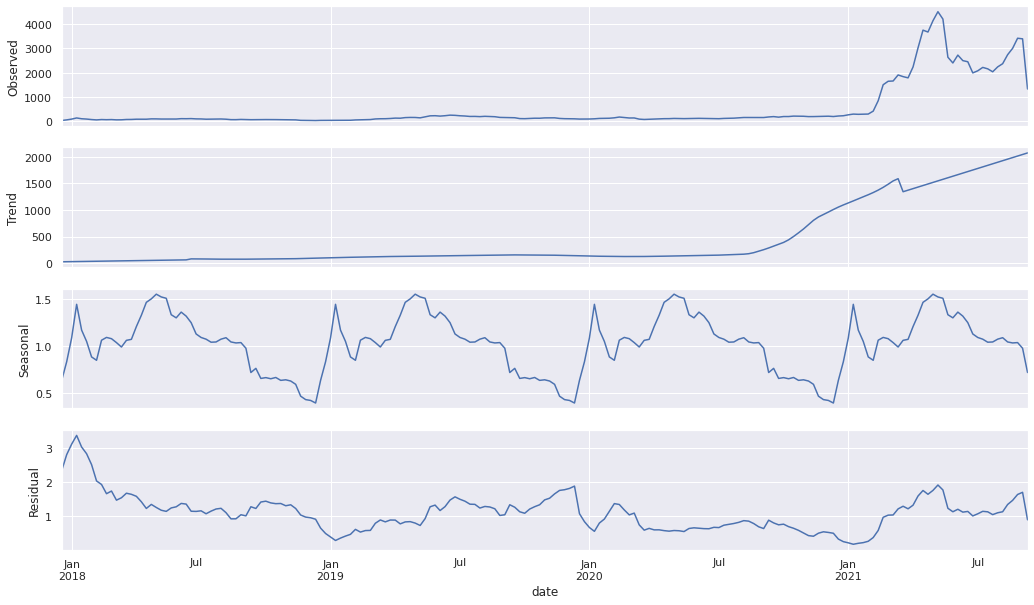

<Figure size 720x432 with 0 Axes>

In [141]:
#MULTIPLICATIVE MODEL ON BNB WEEKLY SEASONALITY
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonaldecompose(data_bnb):
  Decomposition = sm.tsa.seasonal_decompose (data_bnb, model='multiplicative',extrapolate_trend= 'freq')
  Figure = Decomposition.plot()
  Figure.set_size_inches(15,9)
  plt.show()


seasonaldecompose(ts_weekly3)
plt.savefig('multiplicativebnb.png')

In [142]:
#Augumented Dickey-Fuller test
import statsmodels.api
from statsmodels.tsa.stattools import adfuller

def test_stationarity(data, title):
  rolmean = pd.Series(data).rolling(window = 12).mean()
  rolstd = pd.Series(data).rolling(window = 12).std()
  fig, ax = plt.subplots(figsize = (16, 4))
  ax.plot(data, label = title)
  ax.plot(rolmean, label = 'Rolling Mean');
  ax.plot(rolstd, label = 'Rolling STD (x10)');
  ax.legend()

def ADF_test(timeseries_data, data_desc):
  print(' > Is the {} stationary ?'.format(data_desc))
  df_test = adfuller(timeseries_data.dropna(), autolag='AIC')
  print('Test statistic = {:.3F}'.format(df_test[0]))
  print('P-value = {:.12f}'.format(df_test[1]))
  print('Critical values :')
  for k, v in df_test[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<df_test[0] else '', 100-int(k[:-1])))

In [143]:
#Stationarity test
#BTC
season1 = season1['close']
# season1

#ETH
season2 = season2['close']
# season2

#BNB
season3 = season3['close']
# season3

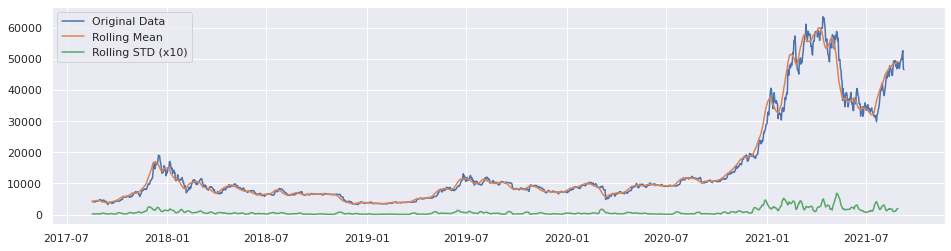

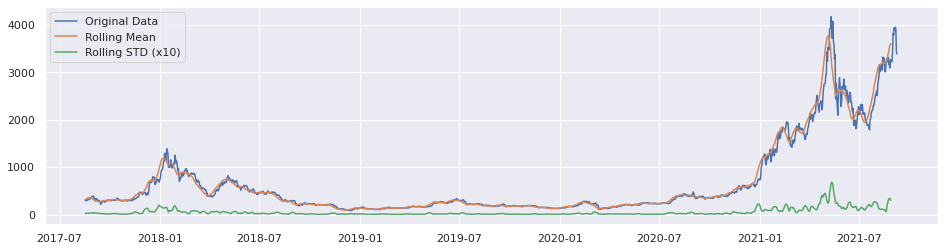

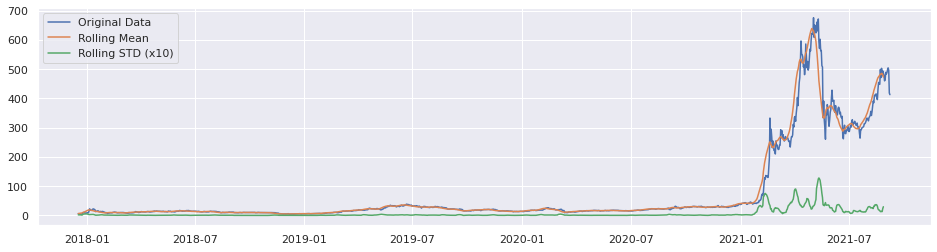

In [144]:
#BTC
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(season1, 'Original Data')

#ETH
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(season2, 'Original Data')

#BNB
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(season3, 'Original Data')

In [145]:
#ADF Test for BTC
ADF_test(season1, 'original data')

 > Is the original data stationary ?
Test statistic = -2.311
P-value = 0.168389520765
Critical values :
	1%: -3.4348399537053482 - The data is not stationary with 99% confidence
	5%: -2.8635230163107837 - The data is not stationary with 95% confidence
	10%: -2.5678257404326903 - The data is not stationary with 90% confidence


In [146]:
#ADF Test for ETH 
ADF_test(season2, 'original data')

 > Is the original data stationary ?
Test statistic = -3.875
P-value = 0.002223098806
Critical values :
	1%: -3.434815425568625 - The data is  stationary with 99% confidence
	5%: -2.8635121913888306 - The data is  stationary with 95% confidence
	10%: -2.567819976000063 - The data is  stationary with 90% confidence


In [147]:
#ADF Test for BNB
ADF_test(season3, 'original data')

 > Is the original data stationary ?
Test statistic = -2.832
P-value = 0.053821699958
Critical values :
	1%: -3.43525412340878 - The data is not stationary with 99% confidence
	5%: -2.8637057871215243 - The data is not stationary with 95% confidence
	10%: -2.5679230707671485 - The data is  stationary with 90% confidence


To remove time dependency, we perform differencing.

In [148]:
#Performing differencing on BTC to remove time dependency
data1 = df1['close'] - df1['close'].shift(1)
# data

#Performing differencing on ETH to remove time dependency
data2 = df2['close'] - df2['close'].shift(1)

#Performing differencing on BNB to remove time dependency
data3 = df3['close'] - df3['close'].shift(1)

In [149]:
#BTC Stationarity test
ADF_test(data1, 'original data')

 > Is the original data stationary ?
Test statistic = -7.731
P-value = 0.000000000011
Critical values :
	1%: -3.4348399537053482 - The data is  stationary with 99% confidence
	5%: -2.8635230163107837 - The data is  stationary with 95% confidence
	10%: -2.5678257404326903 - The data is  stationary with 90% confidence


In [150]:
#ETH Stationarity Test
ADF_test(data2, 'original data')

 > Is the original data stationary ?
Test statistic = -11.446
P-value = 0.000000000000
Critical values :
	1%: -3.434815425568625 - The data is  stationary with 99% confidence
	5%: -2.8635121913888306 - The data is  stationary with 95% confidence
	10%: -2.567819976000063 - The data is  stationary with 90% confidence


In [151]:
#BNB Stationarity Test
ADF_test(data3, 'original data')

 > Is the original data stationary ?
Test statistic = -6.603
P-value = 0.000000006656
Critical values :
	1%: -3.4352578040092436 - The data is  stationary with 99% confidence
	5%: -2.863707411237363 - The data is  stationary with 95% confidence
	10%: -2.5679239356703 - The data is  stationary with 90% confidence


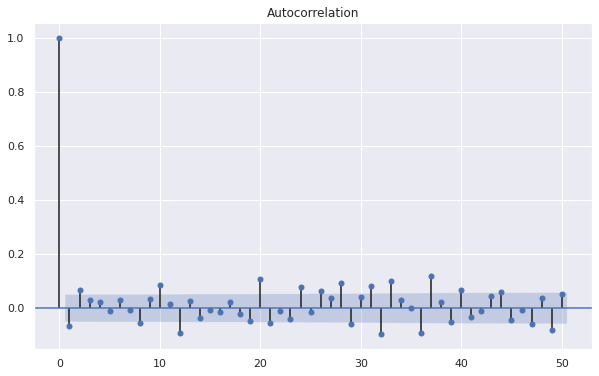

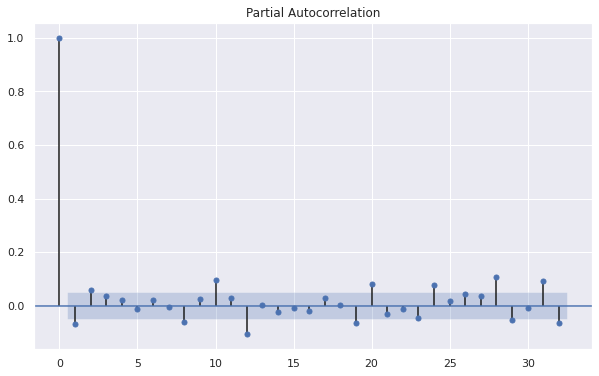

In [152]:
#BTC
#Autocorrelation plot after differencing
data1 = df1['close'] - df1['close'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data1[1:], lags=50);

#Partial Autocorrelation Plot after differencing
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data1[1:]);



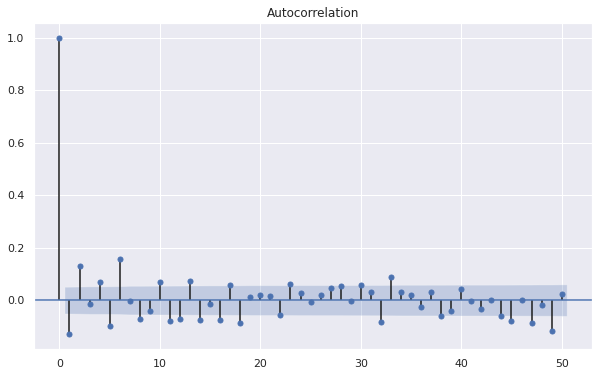

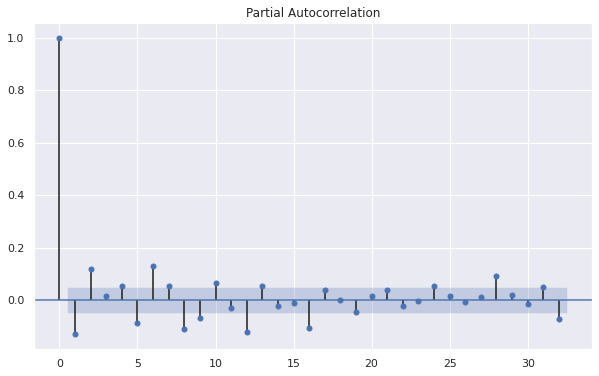

In [153]:
#ETH
#Autocorrelation plot after differencing
data2 = df2['close'] - df2['close'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data2[1:], lags=50);

#Partial Autocorrelation Plot after differencing
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data2[1:]);

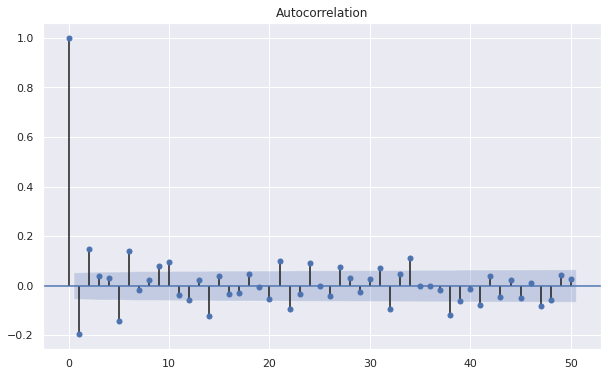

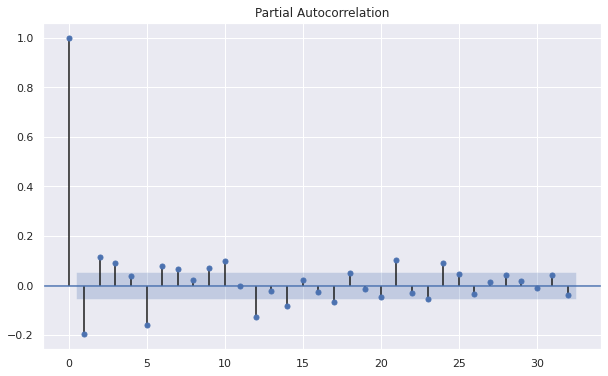

In [154]:
#BNB
#Autocorrelation plot after differencing
data3 = df3['close'] - df3['close'].shift(1)
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(data3[1:], lags=50);

#Partial Autocorrelation Plot after differencing
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(data3[1:]);

In [155]:
# RET_df_corr = pd.DataFrame({'BTC':df1['Returns'], 'ETH':df2['Returns'], 'BNB':df3['Returns']})
# RET_df_corr.plot()

**Lagging Indicators**
The next calculations we’ll walk through are two different kinds of lagging indicators, moving average and Bollinger Band plots. The moving average is a common technique analysts use to smooth out short-term fluctuations in stock prices to understand trends in price direction. Here we’ll plot the moving average for BTC, ETH and BNB. 

 We’ll plot the 10-day moving average for the Cryptocurrencues adjusted close stock price and consider stock prices after January 4, 2021 (2021 Bitcoin spike):

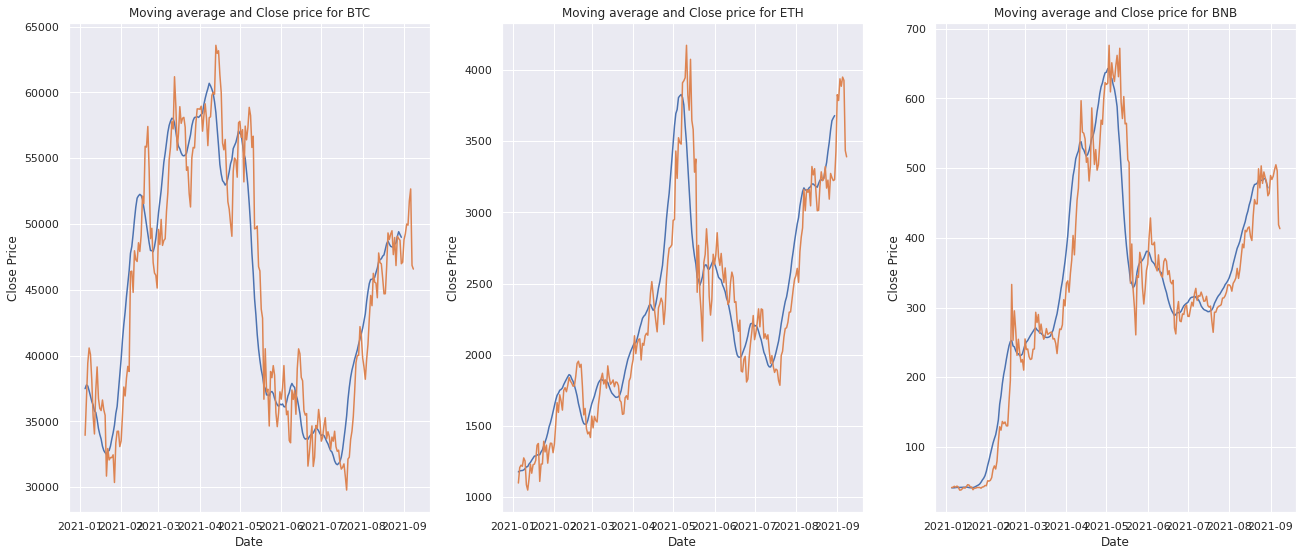

In [156]:
import datetime
fig_sma = plt.figure(figsize=(22, 9))
plt.subplot(1,3,1)
btc_cutoff = datetime.datetime(2021,1,4)
df1.index = pd.to_datetime(df1.index, format='%Y/%m/%d')
df1_sma = df1[df1.index > btc_cutoff]
df1_sma['SMA_10'] = df1_sma['close'].rolling(window=10).mean()
# print(df1_sma.head())
plt.plot(df1_sma.index, df1_sma['SMA_10'])
plt.plot(df1_sma.index, df1_sma['close'])
plt.title("Moving average and Close price for BTC")
plt.ylabel('Close Price')
plt.xlabel('Date')
# plt.show()

plt.subplot(1,3,2)
eth_cutoff = datetime.datetime(2021,1,4)
df2.index = pd.to_datetime(df2.index, format='%Y/%m/%d')
df2_sma = df2[df2.index > eth_cutoff]
df2_sma['SMA_10'] = df2_sma['close'].rolling(window=10).mean()
# print(df2_sma.head())
plt.plot(df2_sma.index, df2_sma['SMA_10'])
plt.plot(df2_sma.index, df2_sma['close'])
plt.title("Moving average and Close price for ETH")
plt.ylabel('Close Price')
plt.xlabel('Date')
# plt.show()

plt.subplot(1,3,3)
bnb_cutoff = datetime.datetime(2021,1,4)
df3.index = pd.to_datetime(df3.index, format='%Y/%m/%d')
df3_sma = df3[df3.index > bnb_cutoff]
df3_sma['SMA_10'] = df3_sma['close'].rolling(window=10).mean()
# print(df3_sma.head())
plt.plot(df3_sma.index, df3_sma['SMA_10'])
plt.plot(df3_sma.index, df3_sma['close'])
plt.title("Moving average and Close price for BNB")
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()
fig_sma.savefig('sma.png')

**Bollinger Band plot**, which is a way to visualize the dispersion in the moving average. The bands are defined by upper and lower bounds that are two standard deviations away from the simple moving average. This is useful for traders because it allows them to take advantage of fluctuations in price volatilities. 

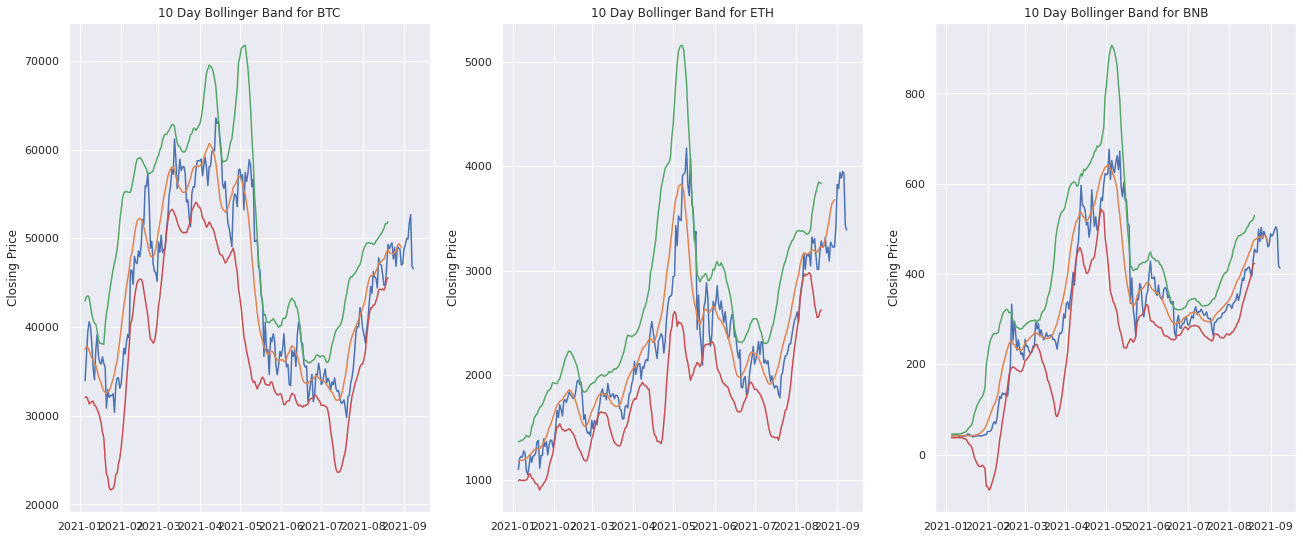

In [157]:
#10 Day Bollinger Band for BTC
fig_boll = plt.figure(figsize=(22, 9))
plt.subplot(1,3,1)
df1_sma['SMA_10_STD'] = df1['close'].rolling(window=20).std()
df1_sma['Upper Band'] = df1_sma['SMA_10'] + (df1_sma['SMA_10_STD'] * 2)
df1_sma['Lower Band'] = df1_sma['SMA_10'] - (df1_sma['SMA_10_STD'] * 2)
plt.plot(df1_sma[['close', 'SMA_10', 'Upper Band', 'Lower Band']])
plt.title('10 Day Bollinger Band for BTC')
plt.ylabel('Closing Price')
# plt.show()

#10 Day Bollinger Band for ETH
plt.subplot(1,3,2)
df2_sma['SMA_10_STD'] = df2['close'].rolling(window=20).std()
df2_sma['Upper Band'] = df2_sma['SMA_10'] + (df2_sma['SMA_10_STD'] * 2)
df2_sma['Lower Band'] = df2_sma['SMA_10'] - (df2_sma['SMA_10_STD'] * 2)
plt.plot(df2_sma[['close', 'SMA_10', 'Upper Band', 'Lower Band']])
plt.title('10 Day Bollinger Band for ETH')
plt.ylabel('Closing Price')


#10 Day Bollinger Band for BNB
plt.subplot(1,3,3)
df3_sma['SMA_10_STD'] = df3['close'].rolling(window=20).std()
df3_sma['Upper Band'] = df3_sma['SMA_10'] + (df3_sma['SMA_10_STD'] * 2)
df3_sma['Lower Band'] = df3_sma['SMA_10'] - (df3_sma['SMA_10_STD'] * 2)
plt.plot(df3_sma[['close', 'SMA_10', 'Upper Band', 'Lower Band']])
plt.title('10 Day Bollinger Band for BNB')
plt.ylabel('Closing Price')

plt.show()

fig_boll.savefig('btc-bollinger.png')
# files.download('btc-bollinger.png')

In [158]:
#!pip install python-utils
from sklearn.model_selection import train_test_split

In [159]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn . metrics import roc_curve, auc, precision_recall_curve, average_precision_score, plot_precision_recall_curve




**PREDICTION USING STATIONARY DATA**


In [160]:
data1

date
2021-09-08              nan
2021-09-07     287.36000000
2021-09-06    5800.17000000
2021-09-05    -907.02000000
2021-09-04   -1841.24000000
                  ...      
2017-08-21     -24.00000000
2017-08-20      70.29000000
2017-08-19      53.69000000
2017-08-18     -31.61000000
2017-08-17     176.71000000
Name: close, Length: 1484, dtype: float64

In [161]:
#Extracting Close of the three cryptocurrencies
# df_stat.loc[~df_stat.index.duplicated(), :]

df_stat = pd.DataFrame({'BTC': data1,
                   'ETH': data2,
                   'BNB': data3})
df_stat.head()
df_stat.tail

<bound method NDFrame.tail of                       BTC          ETH         BNB
date                                              
2017-08-17   176.71000000   8.04000000         nan
2017-08-18   -31.61000000   3.05000000         nan
2017-08-19    53.69000000  -8.19000000         nan
2017-08-20    70.29000000 -24.19000000         nan
2017-08-21   -24.00000000  13.49000000         nan
...                   ...          ...         ...
2021-09-04 -1841.24000000 -64.77000000 -7.10000000
2021-09-05  -907.02000000  23.52000000  8.70000000
2021-09-06  5800.17000000 492.20000000 77.40000000
2021-09-07   287.36000000  44.51000000  5.60000000
2021-09-08            nan          nan         nan

[1484 rows x 3 columns]>

In [162]:
# #REPLACING MISSING VALUES WITH MEDIAN 
df_stat.fillna(df_stat.median(), inplace=True)
# df.info()

In [163]:
# fix random seed for reproducibility
numpy.random.seed(7)
tf.random.set_seed(7)

stat_data_set = df_stat['2019-07-01':'2021-07-31'] 
stat_data_set


BTC          ETH         BNB
date                                              
2019-07-01  -217.92000000   3.59000000  1.30000000
2019-07-02 -1097.15000000  -9.66000000 -0.54430000
2019-07-03   794.33000000  18.41000000 -0.56680000
2019-07-04   174.94000000  -4.74000000  0.53220000
2019-07-05  -285.76000000  -0.82000000 -0.03220000
...                   ...          ...         ...
2021-07-27  -561.69000000  -1.41000000 -0.32000000
2021-07-28     3.08000000 -82.02000000 -3.23000000
2021-07-29 -2189.89000000 -78.89000000 -5.55000000
2021-07-30   744.54000000 -69.24000000 -9.80000000
2021-07-31  1616.39000000 -24.64000000 -0.21000000

[762 rows x 3 columns]

In [164]:
# We want 80% of the data to be used for training, and 20% for testing
stat_n_train_rows1 = int(stat_data_set.shape[0]*.8)-1

# Split into train and test sets but keep all 3 columns
stat_train1 = stat_data_set.iloc[:stat_n_train_rows1, :]
stat_test1 = stat_data_set.iloc[stat_n_train_rows1:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(stat_train1.shape)
print(stat_test1.shape)

(608, 3)
(154, 3)


In [165]:
# Normalise features
sc1 = MinMaxScaler(feature_range = (0, 1))
stat_training_set_scaled1 = sc1.fit_transform(stat_train1.values)
stat_test_set_scaled1 = sc1.fit_transform(stat_test1.values)
stat_training_set_scaled1

steps = 60

In [166]:
# Prepare the training data
stat_x_train1 = []
stat_y_train1 = []

for i in range(steps, stat_training_set_scaled1.shape[0]-steps):
    stat_x_train1.append(stat_training_set_scaled1[i-steps:i, :])
    stat_y_train1.append(stat_training_set_scaled1[i, :])

stat_x_train1, stat_y_train1 = np.array(stat_x_train1), np.array(stat_y_train1)
print(stat_x_train1.shape)

(488, 60, 3)


In [167]:
# Prepare the test data
stat_x_test1 = []
stat_y_test1 = []

for i in range(steps, stat_test_set_scaled1.shape[0]):
    stat_x_test1.append(stat_test_set_scaled1[i-steps:i, :])
    stat_y_test1.append(stat_test_set_scaled1[i, :])

stat_x_test1, stat_y_test1 = np.array(stat_x_test1), np.array(stat_y_test1)
print(stat_x_test1.shape)

(94, 60, 3)


In [168]:

stat_model_lstm1 = Sequential()

epochs = 300

stat_model_lstm1 = Sequential() 

#Adding the first LSTM Layer and Dropout regiularisation
stat_model_lstm1.add(LSTM(units = 78, activation = 'tanh',return_sequences = True, input_shape = (stat_x_train1.shape[1], 3)))
stat_model_lstm1.add(Dropout(0.2)) 

#Adding the second LSTM Layer and Dropout regularisation
stat_model_lstm1.add(LSTM(units = 78, activation = 'tanh', return_sequences = True))
stat_model_lstm1.add(Dropout(0.2)) 

#Adding the thirs LSTM Model and Droupout regularisation
stat_model_lstm1.add(LSTM(units = 80, activation = 'tanh'))
stat_model_lstm1.add(Dropout(0.2)) 

#Adding the output layer
stat_model_lstm1.add(Dense(units =3))

#Getting the LSTM Model summary 
stat_model_lstm1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 78)            25584     
_________________________________________________________________
dropout (Dropout)            (None, 60, 78)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 78)            48984     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 78)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                50880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                

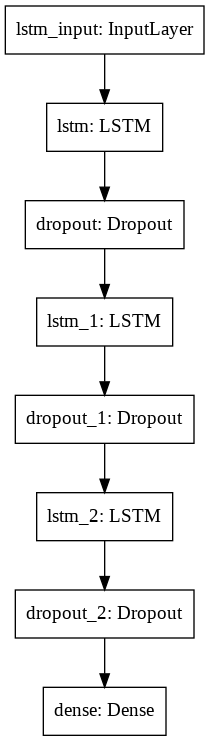

In [169]:
from keras.utils.vis_utils import plot_model
plot_model(
stat_model_lstm1, to_file='statlstmmodel1.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [170]:
# tf.keras.utils.plot_model(stat_model_lstm1, to_file=dot_img_file, show_shapes=True)



In [171]:
import time 
start = time.time()


from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model


# simple early stopping
stat_lstm_es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
stat_lstm_mc1 = ModelCheckpoint('stat_lstm1_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

keras.backend.set_epsilon(1)

#Compiling the model
stat_model_lstm1.compile(loss="mae", optimizer="adam", metrics=['accuracy'])

#Fitting the model to the train test and validating the model
stat_lstm1_history = stat_model_lstm1.fit(stat_x_train1, stat_y_train1, batch_size = 32, epochs = 300, validation_data=(stat_x_test1, stat_y_test1), verbose=1, callbacks=[stat_lstm_es1, stat_lstm_mc1])

#Loading and saving the best model
stat_lstm1_saved_model = load_model('stat_lstm1_best_model.h5')
stat_model_lstm1.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("First Stationary LSTM Model saved")

#Calculating the time taken to complete the simulation
end = time.time()
print(f"Total time taken is: {end-start} seconds") 


Epoch 1/300
16/16 [==============================] - 8s 80ms/step - loss: 0.1650 - accuracy: 0.4898 - val_loss: 0.1221 - val_accuracy: 0.0213

Epoch 00001: val_accuracy improved from -inf to 0.02128, saving model to stat_lstm1_best_model.h5
Epoch 2/300
16/16 [==============================] - 0s 15ms/step - loss: 0.0642 - accuracy: 0.6270 - val_loss: 0.1385 - val_accuracy: 0.0213

Epoch 00002: val_accuracy did not improve from 0.02128
Epoch 3/300
16/16 [==============================] - 0s 15ms/step - loss: 0.0572 - accuracy: 0.7172 - val_loss: 0.1329 - val_accuracy: 0.0213

Epoch 00003: val_accuracy did not improve from 0.02128
Epoch 4/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0548 - accuracy: 0.7480 - val_loss: 0.1481 - val_accuracy: 0.0213

Epoch 00004: val_accuracy did not improve from 0.02128
Epoch 5/300
16/16 [==============================] - 0s 15ms/step - loss: 0.0555 - accuracy: 0.7664 - val_loss: 0.1396 - val_accuracy: 0.6489

Epoch 00005: val_accur

In [172]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = stat_lstm1_saved_model.evaluate(stat_x_test1, stat_y_test1, verbose=0)
print('test loss, test acc:', results)


# Evaluate on test data
test loss, test acc: [0.13960854709148407, 0.6489361524581909]


In [173]:
# Evaluate the model on the train data using `evaluate`
print('\n# Evaluate on train data')
results = stat_lstm1_saved_model.evaluate(stat_x_train1, stat_y_train1, verbose=0)
print('train loss, train acc:', results)


# Evaluate on train data
train loss, train acc: [0.02227410301566124, 0.9692623019218445]


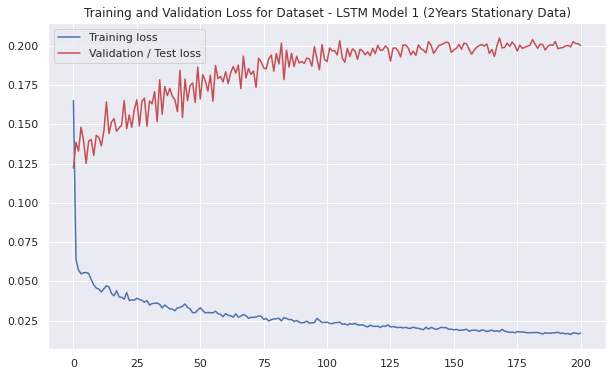

In [174]:
#checking for training and validation loss
stat_loss1 = stat_lstm1_history.history['loss']
stat_val_loss1 = stat_lstm1_history.history['val_loss']
stat_epochs1 = range(len(stat_loss1))
plt.figure()
plt.plot(stat_epochs1, (stat_loss1), 'b', label='Training loss')
plt.plot(stat_epochs1, (stat_val_loss1), 'r', label='Validation / Test loss')
plt.title("Training and Validation Loss for Dataset - LSTM Model 1 (2Years Stationary Data)")
plt.legend()
plt.show()
# trainplot1.savefig('train/testloss-lstm1.png')

In [175]:
# Predict values from test data trained using training data
stat_y_hat1 = stat_lstm1_saved_model.predict(stat_x_test1)
stat_y_hat1 = sc1.inverse_transform(stat_y_hat1)
stat_y_hat1


array([[1029.9977  ,  -30.321516,   42.881268],
       [ 999.5738  ,  -33.476818,   42.217075],
       [ 961.07764 ,  -37.292953,   41.38684 ],
       [ 923.02783 ,  -40.95311 ,   40.577045],
       ...,
       [ 955.8853  ,  -37.64023 ,   41.37959 ],
       [ 917.86945 ,  -41.031963,   40.60235 ],
       [ 878.9522  ,  -44.502914,   39.804615],
       [ 842.93134 ,  -47.743324,   39.049862]], dtype=float32)

In [176]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
stat_preds1 = stat_lstm1_saved_model.predict(stat_x_test1).squeeze()
stat_mae1 = mean_absolute_error(stat_preds1, stat_y_test1)
print('MAE: %f' % stat_mae1)

MAE: 0.139609


In [177]:
new_stat_y_test1 = sc1.inverse_transform(stat_y_test1)
new_stat_y_test1

array([[-4.13927e+03, -1.53800e+01, -2.29500e+01],
       [-1.06100e+02, -1.72350e+02,  2.65000e+00],
       [ 1.22216e+03, -4.79000e+00, -1.78000e+00],
       [-5.91180e+02, -4.81480e+02, -5.43700e+01],
       ...,
       [ 3.08000e+00, -8.20200e+01, -3.23000e+00],
       [-2.18989e+03, -7.88900e+01, -5.55000e+00],
       [ 7.44540e+02, -6.92400e+01, -9.80000e+00],
       [ 1.61639e+03, -2.46400e+01, -2.10000e-01]])

In [178]:
new_stat_preds1 = sc1.inverse_transform(stat_preds1)

In [179]:
# def mean_absolute_percentage_error(y_true, y_pred):
#   diff = np.abs((stat_y_test1 - stat_preds1) / K.clip(np.abs(stat_y_test1),
#                                         K.epsilon(),
#                                         None))
#   return 100. * np.mean(diff, axis=-1)
# mean_absolute_percentage_error(stat_y_test1, stat_preds1)

In [180]:
#Mean Absolute Percentage Error
def MAPE(stat_y_test1,stat_preds1):
    mape = np.mean(np.abs((stat_y_test1 - stat_preds1)/stat_y_test1))*100
    return mape
MAPE(new_stat_y_test1,new_stat_preds1)

883.488519367201

In [181]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
stat_preds2 = stat_lstm1_saved_model.predict(stat_x_test1).squeeze()
stat_mse2 = mean_squared_error(stat_preds2, stat_y_test1)
print('MSE: %f' % stat_mse2)

MSE: 0.031507


In [182]:
#Root Mean Squared Error
from math import sqrt
stat_rmse1 = sqrt(stat_mse2)
print('RMSE: %f' % stat_rmse1)

RMSE: 0.177501


In [183]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(stat_y_test1,stat_preds1)
stat_r_squared

-0.6936886066308431

In [184]:
stat_lstm_y_test1 = stat_test1[steps:].reset_index()
stat_lstm_y_test1

date            BTC           ETH          BNB
0  2021-04-29 -4139.27000000  -15.38000000 -22.95000000
1  2021-04-30  -106.10000000 -172.35000000   2.65000000
2  2021-05-01  1222.16000000   -4.79000000  -1.78000000
3  2021-05-02  -591.18000000 -481.48000000 -54.37000000
4  2021-05-03  3969.38000000  192.03000000  66.85000000
..        ...            ...           ...          ...
89 2021-07-27  -561.69000000   -1.41000000  -0.32000000
90 2021-07-28     3.08000000  -82.02000000  -3.23000000
91 2021-07-29 -2189.89000000  -78.89000000  -5.55000000
92 2021-07-30   744.54000000  -69.24000000  -9.80000000
93 2021-07-31  1616.39000000  -24.64000000  -0.21000000

[94 rows x 4 columns]

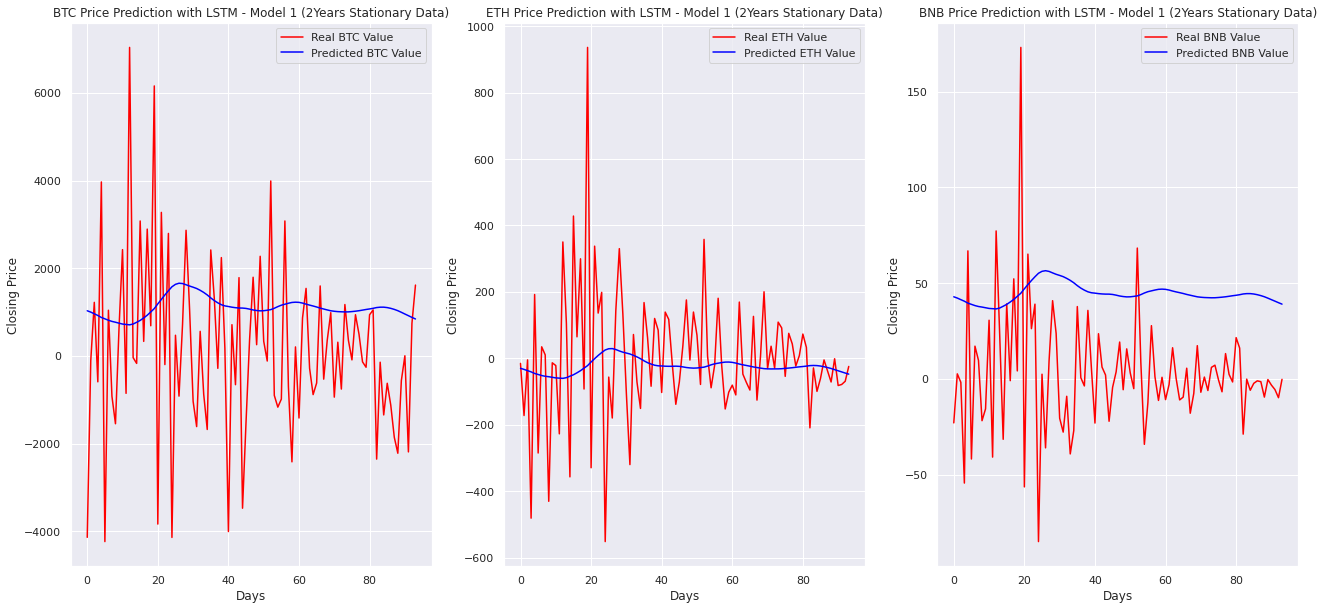

In [185]:
# Visualise BTC predictions
fig_predlstm3 = plt.figure(figsize=(22, 10))
plt.subplot(1,3,1)
plt.plot(stat_lstm_y_test1['BTC'], color = 'red', label = 'Real BTC Value')
plt.plot(stat_y_hat1[:,0], color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Price Prediction with LSTM - Model 1 (2Years Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise ETH predictions
plt.subplot(1,3,2)
plt.plot(stat_lstm_y_test1['ETH'], color = 'red', label = 'Real ETH Value')
plt.plot(stat_y_hat1[:,1], color = 'blue', label = 'Predicted ETH Value')
plt.title('ETH Price Prediction with LSTM - Model 1 (2Years Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(stat_lstm_y_test1['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_y_hat1[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with LSTM - Model 1 (2Years Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predlstm3.savefig('RNN-LSTM prediction1.png')


CNN PREDICTION 1 - 2YEARS STATIONARY DATA


In [186]:
import time 
start = time.time()


stat_cnn1_model = Sequential()

#Adding the Convolutional Layer and Dropout Regularisation
stat_cnn1_model.add(Conv1D(78,3, strides=3,input_shape=(stat_x_train1.shape[1], 3)))
stat_cnn1_model.add(Activation('relu'))
stat_cnn1_model.add(Dropout(0.2)) 

#Adding the pooling layer - MaxPooling
stat_cnn1_model.add(MaxPooling1D(pool_size=2))

#Adding the fully connected / Dense Layer
stat_cnn1_model.add(Flatten())
stat_cnn1_model.add(Dense(32))

#Adding the output layer
stat_cnn1_model.add(Dense(3, activation='relu'))

# simple early stopping
stat_cnn1_es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
stat_cnn1_mc1 = ModelCheckpoint('stat_cnn1_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Compiling the model
stat_cnn1_model.compile(loss='mae',
                  optimizer= 'adam',
                  metrics=['accuracy'])

#Fitting ht emodel to the train set and validating using the test set
stat_cnn1_history = stat_cnn1_model.fit(stat_x_train1, stat_y_train1, batch_size=32, epochs=300, verbose=1, validation_data=(stat_x_test1, stat_y_test1), callbacks=[stat_cnn1_es1, stat_cnn1_mc1])

# loading and saving the best model
stat_cnn1_saved_model = load_model('stat_cnn1_best_model.h5')

#Calculating the time taken to complete the simulation
end = time.time()
print(f"Total time taken is: {end-start} seconds") 

Epoch 1/300
16/16 [==============================] - 13s 14ms/step - loss: 0.4319 - accuracy: 0.1762 - val_loss: 0.3165 - val_accuracy: 0.0213

Epoch 00001: val_accuracy improved from -inf to 0.02128, saving model to stat_cnn1_best_model.h5
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2682 - accuracy: 0.8053 - val_loss: 0.2106 - val_accuracy: 0.1383

Epoch 00002: val_accuracy improved from 0.02128 to 0.13830, saving model to stat_cnn1_best_model.h5
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.9631 - val_loss: 0.2190 - val_accuracy: 0.0957

Epoch 00003: val_accuracy did not improve from 0.13830
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9672 - val_loss: 0.2237 - val_accuracy: 0.0851

Epoch 00004: val_accuracy did not improve from 0.13830
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9693 - val_loss: 0.2239 - val

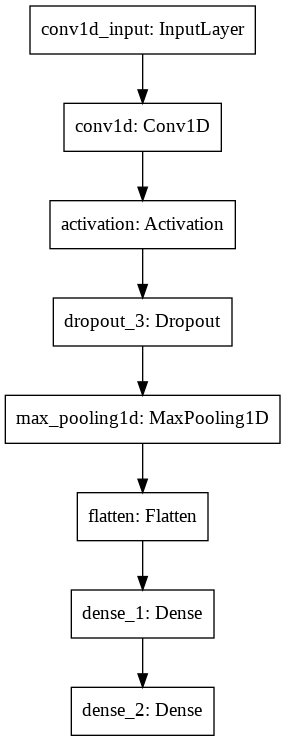

In [187]:
from keras.utils.vis_utils import plot_model
plot_model(
stat_cnn1_model, to_file='statcnnmodel1.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [188]:
#Evaluate the model on the test data (test loss and test accuracy) using "evaluate"
stat_cnn1_score = stat_cnn1_saved_model.evaluate(stat_x_test1, stat_y_test1, verbose=1)
print('Test loss:', stat_cnn1_score[0])
print('Test accuracy:', stat_cnn1_score[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.1383
Test loss: 0.21059028804302216
Test accuracy: 0.13829787075519562


In [189]:
# Evaluate the model on the train data (train loss and train accuracy) using "evaluate"
print('\n# Evaluate on train data')
results = stat_cnn1_saved_model.evaluate(stat_x_train1, stat_y_train1, verbose=0)
print('train loss, train acc:', results)


# Evaluate on train data
train loss, train acc: [0.28253719210624695, 0.9692623019218445]


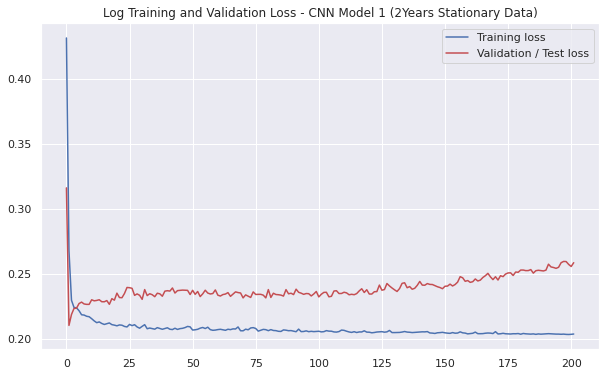

In [190]:
#checking for training and validation loss
stat_cnn1_loss = stat_cnn1_history.history['loss']
stat_cnn1_val_loss = stat_cnn1_history.history['val_loss']
stat_cnn1_epochs = range(len(stat_cnn1_loss))
plt.figure()
plt.plot(stat_cnn1_epochs, (stat_cnn1_loss), 'b', label='Training loss')
plt.plot(stat_cnn1_epochs, (stat_cnn1_val_loss), 'r', label='Validation / Test loss')
plt.title("Log Training and Validation Loss - CNN Model 1 (2Years Stationary Data)")
plt.legend()
plt.show()
# plt.savefig('train/testloss-cnn3.png')

In [191]:
# Predict values from test data trained using training data
stat_cnn1_y_hat = stat_cnn1_saved_model.predict(stat_x_test1)
stat_cnn1_y_hat = sc1.inverse_transform(stat_cnn1_y_hat)
stat_cnn1_y_hat

array([[-4.934620e+03,  7.554467e+01, -2.519695e+00],
       [-4.934620e+03, -3.960030e+01,  4.841384e+00],
       [-4.934620e+03, -1.358747e+01, -1.039016e+00],
       [-4.934620e+03,  9.826223e+01, -1.348051e+01],
       ...,
       [-4.934620e+03, -1.198090e+02,  9.321218e+00],
       [-4.934620e+03, -1.194996e+01, -5.402700e+00],
       [-4.934620e+03, -9.916057e+01,  8.030989e+00],
       [-4.934620e+03, -1.018758e+02,  1.491779e+01]], dtype=float32)

In [192]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
stat_cnn1_preds1 = stat_cnn1_saved_model.predict(stat_x_test1).squeeze()
stat_cnn1_mae1 = mean_absolute_error(stat_cnn1_preds1, stat_y_test1)
print('MAE: %f' % stat_cnn1_mae1)

MAE: 0.210590


In [193]:
#Inverse transform on the prediction set to get MAPE
new_stat_cnn1_preds1 = sc1.inverse_transform(stat_cnn1_preds1)

In [194]:
# #Mean Absolute Percentage Error 
def MAPE(stat_y_test1,stat_cnn1_preds1):
    mape = np.mean(np.abs((stat_y_test1 - stat_cnn1_preds1)/stat_y_test1))*100
    return mape
MAPE(new_stat_y_test1,new_stat_cnn1_preds1)

1215.5986589983277

In [195]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
stat_cnn1_preds2 = stat_cnn1_saved_model.predict(stat_x_test1).squeeze()
stat_cnn1_mse2 = mean_squared_error(stat_cnn1_preds2, stat_y_test1)
print('MSE: %f' % stat_cnn1_mse2)

MSE: 0.082520


In [196]:
#Root Mean Squared Error
from math import sqrt
stat_cnn1_rmse1 = sqrt(stat_cnn1_mse2)
print('RMSE: %f' % stat_cnn1_rmse1)

RMSE: 0.287263


In [197]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(stat_y_test1,stat_cnn1_preds1)
stat_r_squared

-2.346979455857524

In [198]:
stat_cnn1_y_test = stat_test1[steps:].reset_index()
stat_cnn1_y_test

date            BTC           ETH          BNB
0  2021-04-29 -4139.27000000  -15.38000000 -22.95000000
1  2021-04-30  -106.10000000 -172.35000000   2.65000000
2  2021-05-01  1222.16000000   -4.79000000  -1.78000000
3  2021-05-02  -591.18000000 -481.48000000 -54.37000000
4  2021-05-03  3969.38000000  192.03000000  66.85000000
..        ...            ...           ...          ...
89 2021-07-27  -561.69000000   -1.41000000  -0.32000000
90 2021-07-28     3.08000000  -82.02000000  -3.23000000
91 2021-07-29 -2189.89000000  -78.89000000  -5.55000000
92 2021-07-30   744.54000000  -69.24000000  -9.80000000
93 2021-07-31  1616.39000000  -24.64000000  -0.21000000

[94 rows x 4 columns]

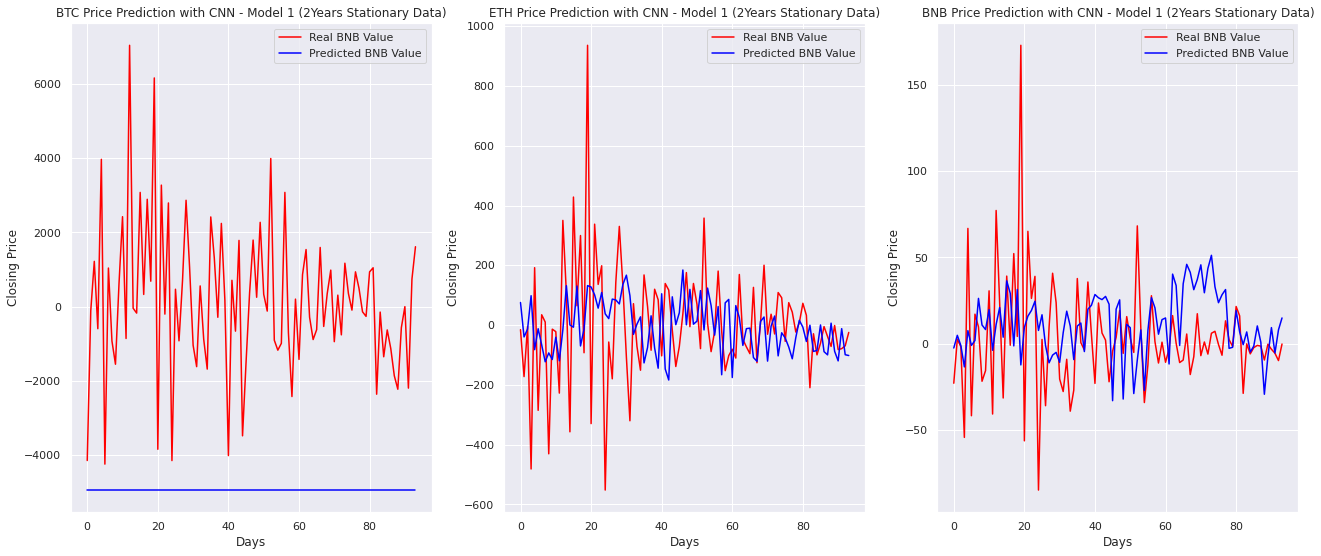

In [199]:
# Visualise BTC predictions
fig_predcnn3 = plt.figure(figsize=(22, 9))
plt.subplot(1,3,1)
plt.plot(stat_cnn1_y_test['BTC'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_cnn1_y_hat[:,0], color = 'blue', label = 'Predicted BNB Value')
plt.title('BTC Price Prediction with CNN - Model 1 (2Years Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise the ETH price predictions
plt.subplot(1,3,2)
plt.plot(stat_cnn1_y_test['ETH'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_cnn1_y_hat[:,1], color = 'blue', label = 'Predicted BNB Value')
plt.title('ETH Price Prediction with CNN - Model 1 (2Years Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(stat_cnn1_y_test['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_cnn1_y_hat[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with CNN - Model 1 (2Years Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predcnn3.savefig('CNN prediction1.png')

SECTION 2: LSTM WITH STATIONARY 4YEAR DATA 

In [200]:
# fix random seed for reproducibility
numpy.random.seed(7)
tf.random.set_seed(7)
stat_dataset = pd.DataFrame({'BTC': data1,
                   'ETH': data2,
                   'BNB': data3})
stat_dataset = stat_dataset['2017-08-17':'2021-07-31']
stat_dataset.head()
stat_dataset.tail

<bound method NDFrame.tail of                       BTC          ETH         BNB
date                                              
2017-08-17   176.71000000   8.04000000         nan
2017-08-18   -31.61000000   3.05000000         nan
2017-08-19    53.69000000  -8.19000000         nan
2017-08-20    70.29000000 -24.19000000         nan
2017-08-21   -24.00000000  13.49000000         nan
...                   ...          ...         ...
2021-07-27  -561.69000000  -1.41000000 -0.32000000
2021-07-28     3.08000000 -82.02000000 -3.23000000
2021-07-29 -2189.89000000 -78.89000000 -5.55000000
2021-07-30   744.54000000 -69.24000000 -9.80000000
2021-07-31  1616.39000000 -24.64000000 -0.21000000

[1445 rows x 3 columns]>

In [201]:
# #REPLACING MISSING VALUES WITH MEDIAN 
stat_dataset.fillna(df_stat.median(), inplace=True)
# df.info()

In [202]:
# We want 80% of the data to be used for training, and 20% for testing
stat_n_train_rows = int(stat_dataset.shape[0]*.8)-1

# Split into train and test sets but keep all 3 columns
stat_train = stat_dataset.iloc[:stat_n_train_rows, :]
stat_test = stat_dataset.iloc[stat_n_train_rows:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(stat_train.shape)
print(stat_test.shape)


(1155, 3)
(290, 3)


In [203]:
# Normalise features
stat_sc = MinMaxScaler(feature_range = (0, 1))
stat_training_set_scaled = stat_sc.fit_transform(stat_train.values)
stat_test_set_scaled = stat_sc.fit_transform(stat_test.values)

steps = 60

In [204]:
# Prepare the training data
stat_x_train = []
stat_y_train = []

for i in range(steps, stat_training_set_scaled.shape[0]-steps):
    stat_x_train.append(stat_training_set_scaled[i-steps:i, :])
    stat_y_train.append(stat_training_set_scaled[i, :])

stat_x_train, stat_y_train = np.array(stat_x_train), np.array(stat_y_train)
print(stat_x_train.shape)

(1035, 60, 3)


In [205]:
# Prepare the test data
stat_x_test = []
stat_y_test = []

for i in range(steps, stat_test_set_scaled.shape[0]):
    stat_x_test.append(stat_test_set_scaled[i-steps:i, :])
    stat_y_test.append(stat_test_set_scaled[i, :])

stat_x_test, stat_y_test = np.array(stat_x_test), np.array(stat_y_test)
print(stat_x_test.shape)

(230, 60, 3)


In [206]:
stat_model = Sequential()

stat_epochs = 300


#Adding the first LSTM layer and Dropout regularisation 
stat_model.add(LSTM(units = 78, activation = 'tanh',return_sequences = True, input_shape = (stat_x_train.shape[1], 3)))
stat_model.add(Dropout(0.2)) 

#Adding the second LSTM layer and Dropout regularisation 
stat_model.add(LSTM(units = 78, activation = 'tanh', return_sequences = True))
stat_model.add(Dropout(0.2)) 

#Adding the third LSTM layer and Dropout regularisation 
stat_model.add(LSTM(units = 80, activation = 'tanh'))
stat_model.add(Dropout(0.2)) 

#Adding the output layer
stat_model.add(Dense(units =3))

#Getting the LSTM model summary
stat_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 78)            25584     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 78)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 78)            48984     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 78)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 80)                50880     
_________________________________________________________________
dropout_6 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [ ]:
import time
start = time.time()

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model


# simple early stopping
stat_es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
stat_mc = ModelCheckpoint('stat_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Compiling the model
stat_model.compile(loss="mae", optimizer="adam", metrics=['accuracy'])

#Fitting the model to the train set and validating using the test set
stat_history = stat_model.fit(stat_x_train, stat_y_train, batch_size = 32, epochs = 300, validation_data=(stat_x_test, stat_y_test), verbose=1, callbacks=[stat_es, stat_mc])

# loading and saving the best model
stat_saved_model = load_model('stat_best_model.h5')
stat_model.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("LSTM Model 4 saved")

#Calculating the time taken to complete the simulation
end = time.time()
print(f"Total time taken is: {end-start} seconds") 

Epoch 1/300
33/33 [==============================] - 5s 56ms/step - loss: 0.1013 - accuracy: 0.4754 - val_loss: 0.0855 - val_accuracy: 0.2043

Epoch 00001: val_accuracy improved from -inf to 0.20435, saving model to stat_best_model.h5
Epoch 2/300
33/33 [==============================] - 0s 14ms/step - loss: 0.0594 - accuracy: 0.5671 - val_loss: 0.0779 - val_accuracy: 0.7870

Epoch 00002: val_accuracy improved from 0.20435 to 0.78696, saving model to stat_best_model.h5
Epoch 3/300
33/33 [==============================] - 0s 12ms/step - loss: 0.0579 - accuracy: 0.5758 - val_loss: 0.0800 - val_accuracy: 0.2043

Epoch 00003: val_accuracy did not improve from 0.78696
Epoch 4/300
33/33 [==============================] - 0s 14ms/step - loss: 0.0539 - accuracy: 0.5884 - val_loss: 0.0878 - val_accuracy: 0.2043

Epoch 00004: val_accuracy did not improve from 0.78696
Epoch 5/300
33/33 [==============================] - 0s 12ms/step - loss: 0.0537 - accuracy: 0.5710 - val_loss: 0.0835 - val_accura

In [ ]:
# Evaluate the model on the test data (test loss and test accuracy) using "evaluate"
print('\n# Evaluate on test data')
stat_results = stat_saved_model.evaluate(stat_x_test, stat_y_test, verbose=0)
print('test loss, test acc:', stat_results)


# Evaluate on test data
test loss, test acc: [0.07788049429655075, 0.7869565486907959]


In [ ]:
# Evaluate the model on the train data (train loss and train accuracy) using "evaluate"
print('\n# Evaluate on train data')
stat_results = stat_saved_model.evaluate(stat_x_train, stat_y_train, verbose=0)
print('train loss, train acc:', stat_results)


# Evaluate on train data
train loss, train acc: [0.05000189691781998, 0.22995169460773468]


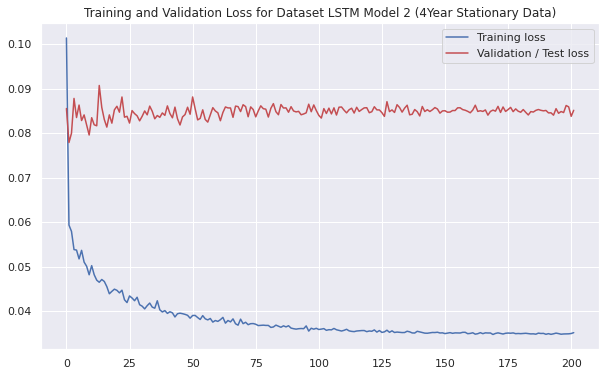

In [ ]:
#checking for training and validation loss
stat_loss = stat_history.history['loss']
stat_val_loss = stat_history.history['val_loss']
stat_epochs = range(len(stat_loss))
plt.figure()
plt.plot(stat_epochs, (stat_loss), 'b', label='Training loss')
plt.plot(stat_epochs, (stat_val_loss), 'r', label='Validation / Test loss')
plt.title("Training and Validation Loss for Dataset LSTM Model 2 (4Year Stationary Data)")
plt.legend()
plt.show()
# plt.savefig('train/testloss-lstm2.png')

In [ ]:
# Predict values from test data trained using training data
stat_y_hat = stat_saved_model.predict(stat_x_test)
stat_y_hat = stat_sc.inverse_transform(stat_y_hat)
stat_y_hat

array([[-9.614777e+02, -3.516071e+01, -1.297258e-01],
       [-9.617769e+02, -3.524272e+01, -1.410185e-01],
       [-9.662288e+02, -3.569767e+01, -2.312307e-01],
       [-9.750733e+02, -3.650585e+01, -4.061939e-01],
       ...,
       [-1.008564e+03, -4.093932e+01, -1.070160e+00],
       [-1.042216e+03, -4.374770e+01, -1.719316e+00],
       [-1.076527e+03, -4.661214e+01, -2.384606e+00],
       [-1.108242e+03, -4.926973e+01, -3.010223e+00]], dtype=float32)

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
stat_preds = stat_saved_model.predict(stat_x_test).squeeze()
stat_mae = mean_absolute_error(stat_preds, stat_y_test)
print('MAE: %f' % stat_mae)

MAE: 0.077880


In [ ]:
stat_preds

array([[0.452713, 0.347321, 0.442322],
       [0.452692, 0.347266, 0.442286],
       [0.452388, 0.34696 , 0.441995],
       [0.451783, 0.346417, 0.441432],
       ...,
       [0.449492, 0.343438, 0.439294],
       [0.44719 , 0.341551, 0.437204],
       [0.444842, 0.339626, 0.435062],
       [0.442673, 0.33784 , 0.433048]], dtype=float32)

In [ ]:
#Performing an inverse transform on hte test and prediction set for MAPE evaluation
new_stat_y_test = stat_sc.inverse_transform(stat_y_test)
new_stat_preds = stat_sc.inverse_transform(stat_preds)

In [ ]:
#Mean Absolute Percentage Error
def MAPE(stat_y_test,stat_preds):
    mape = np.mean(np.abs((stat_y_test - stat_preds)/stat_y_test))*100
    return mape
MAPE(new_stat_y_test,new_stat_preds)


360.9974167299051

In [ ]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
stat_preds2 = stat_saved_model.predict(stat_x_test).squeeze()
stat_mse2 = mean_squared_error(stat_preds2, stat_y_test)
print('MSE: %f' % stat_mse2)

MSE: 0.013189


In [ ]:
#Root Mean Squared Error
from math import sqrt
stat_rmse2 = sqrt(stat_mse2)
print('RMSE: %f' % stat_rmse2)

RMSE: 0.114842


In [ ]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(stat_y_test, stat_preds)
stat_r_squared

-0.10597909585131182

In [ ]:
stat_lstm3_y_test1 = stat_test[steps:].reset_index()

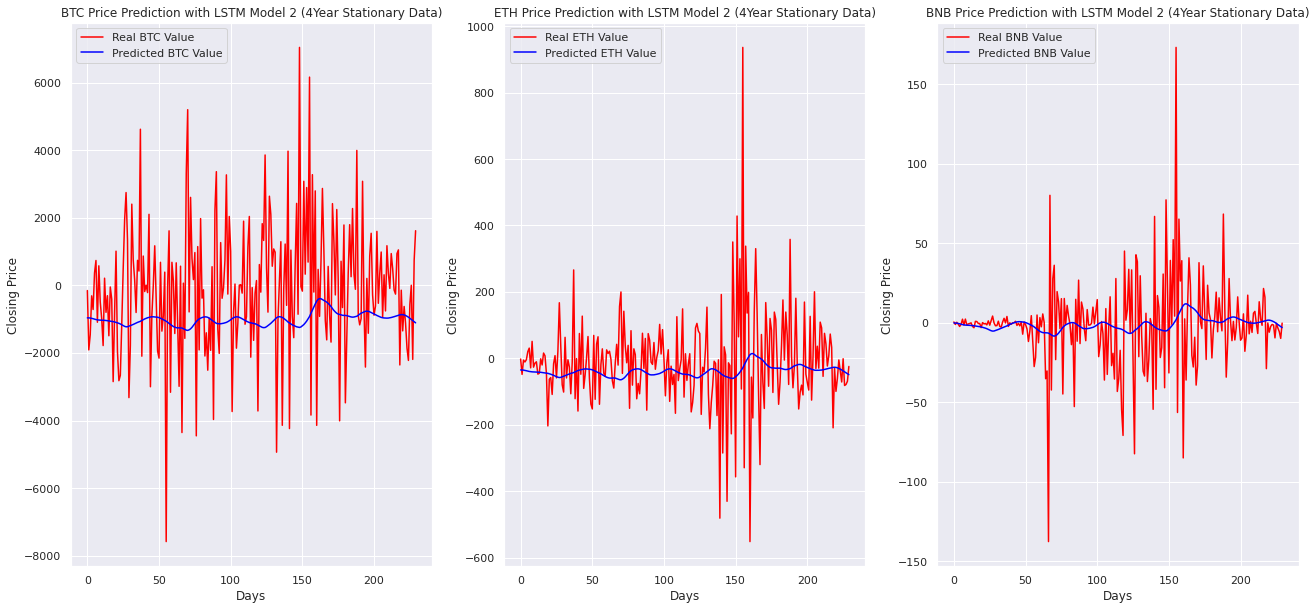

In [ ]:
# Visualise BTC predictions
fig_predlstm4 = plt.figure(figsize=(22, 10))
plt.subplot(1,3,1)
plt.plot(stat_lstm3_y_test1['BTC'], color = 'red', label = 'Real BTC Value')
plt.plot(stat_y_hat[:,0], color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Price Prediction with LSTM Model 2 (4Year Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise ETH predictions
plt.subplot(1,3,2)
plt.plot(stat_lstm3_y_test1['ETH'], color = 'red', label = 'Real ETH Value')
plt.plot(stat_y_hat[:,1], color = 'blue', label = 'Predicted ETH Value')
plt.title('ETH Price Prediction with LSTM Model 2 (4Year Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(stat_lstm3_y_test1['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_y_hat[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with LSTM Model 2 (4Year Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predlstm4.savefig('RNN-LSTM prediction2.png')

CNN MODEL 2

In [ ]:
import time 
start = time.time()

stat_cnn_model = Sequential()

#Adding the Convolutional layer and dropout regularisation
stat_cnn_model.add(Conv1D(78,3, strides=3,input_shape=(stat_x_train.shape[1], 3)))
stat_cnn_model.add(Activation('relu'))
stat_cnn_model.add(Dropout(0.2))

#Adding the Pooling Layer - Max Pooling 
stat_cnn_model.add(MaxPooling1D(pool_size=2))

#Adding the Fully connected / Dense Layer 
stat_cnn_model.add(Flatten())
stat_cnn_model.add(Dense(32))

stat_cnn_model.add(Dense(3, activation='relu'))

# simple early stopping
stat_es4 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
stat_mc4 = ModelCheckpoint('stat_cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Compiling the model
stat_cnn_model.compile(loss='mae',
                  optimizer= 'adam',
                  metrics=['accuracy'])

#Fitting the model to the train set and validating using the test set 
stat_cnn_history = stat_cnn_model.fit(stat_x_train, stat_y_train, batch_size=32, epochs=300, verbose=1, validation_data=(stat_x_test, stat_y_test), callbacks=[stat_es4, stat_mc4])

#Loading and saving the best model
stat_cnn_saved_model = load_model('stat_cnn_best_model.h5')

#Calculating the time taken to complete the simulation
end = time.time()
print(f"Total time taken is: {end-start} seconds") 

Epoch 1/300
33/33 [==============================] - 1s 9ms/step - loss: 0.2495 - accuracy: 0.6435 - val_loss: 0.2249 - val_accuracy: 0.2043

Epoch 00001: val_accuracy improved from -inf to 0.20435, saving model to stat_cnn_best_model.h5
Epoch 2/300
33/33 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.7382 - val_loss: 0.2239 - val_accuracy: 0.2043

Epoch 00002: val_accuracy did not improve from 0.20435
Epoch 3/300
33/33 [==============================] - 0s 3ms/step - loss: 0.1990 - accuracy: 0.7565 - val_loss: 0.2153 - val_accuracy: 0.2087

Epoch 00003: val_accuracy improved from 0.20435 to 0.20870, saving model to stat_cnn_best_model.h5
Epoch 4/300
33/33 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.7643 - val_loss: 0.2128 - val_accuracy: 0.2087

Epoch 00004: val_accuracy did not improve from 0.20870
Epoch 5/300
33/33 [==============================] - 0s 3ms/step - loss: 0.1949 - accuracy: 0.7652 - val_loss: 0.2132 - val_acc

In [ ]:
# Evaluate the model on the test data (test loss and test accuracy) using "evaluate"
stat_cnn_score = stat_cnn_saved_model.evaluate(stat_x_test, stat_y_test, verbose=1)
print('Test loss:', stat_cnn_score[0])
print('Test accuracy:', stat_cnn_score[1])

8/8 [==============================] - 0s 3ms/step - loss: 0.2153 - accuracy: 0.2087
Test loss: 0.21532559394836426
Test accuracy: 0.208695650100708


In [ ]:
# Evaluate the model on the train data (train loss and train accuracy) using "evaluate"
print('\n# Evaluate on train data')
cnn_stat_results = stat_cnn_saved_model.evaluate(stat_x_train, stat_y_train, verbose=0)
print('train loss, train acc:', cnn_stat_results)


# Evaluate on train data
train loss, train acc: [0.20145244896411896, 0.7661835551261902]


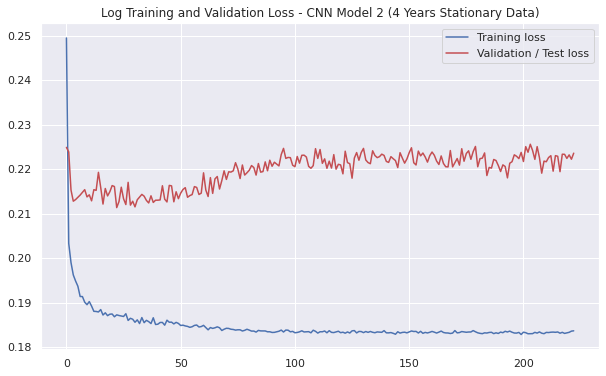

In [ ]:
#checking for training and validation loss
stat_cnn_loss = stat_cnn_history.history['loss']
stat_cnn_val_loss = stat_cnn_history.history['val_loss']
stat_cnn_epochs = range(len(stat_cnn_loss))
plt.figure()
plt.plot(stat_cnn_epochs, (stat_cnn_loss), 'b', label='Training loss')
plt.plot(stat_cnn_epochs, (stat_cnn_val_loss), 'r', label='Validation / Test loss')
plt.title("Log Training and Validation Loss - CNN Model 2 (4 Years Stationary Data)")
plt.legend()
plt.show()
# plt.savefig('train/testloss-cnn4.png')

In [ ]:
# Predict values from test data trained using training data
stat_cnn_y_hat = stat_cnn_saved_model.predict(stat_x_test)
stat_cnn_y_hat = stat_sc.inverse_transform(stat_cnn_y_hat)
stat_cnn_y_hat

array([[-7.579180e+03, -7.273740e+01, -1.542724e+00],
       [-7.579180e+03, -6.542680e+01, -1.612970e+00],
       [-7.579180e+03, -7.694893e+01, -1.251288e+00],
       [-7.579180e+03, -7.294652e+01, -1.838704e+00],
       ...,
       [-7.579180e+03, -6.668785e+01,  7.029687e+00],
       [-7.579180e+03,  1.895341e-01, -1.744900e+00],
       [-7.579180e+03, -6.028349e+01,  1.161830e+01],
       [-7.579180e+03, -3.144951e+01,  1.092301e+01]], dtype=float32)

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
stat_cnn_preds_1 = stat_cnn_saved_model.predict(stat_x_test).squeeze()
stat_cnn_mae_1 = mean_absolute_error(stat_cnn_preds_1, stat_y_test)
print('MAE: %f' % stat_cnn_mae_1)

MAE: 0.215326


In [ ]:
#Taking the inverse transform of the prediction set for MAPE evaluation
new_stat_cnn_preds_1 = stat_sc.inverse_transform(stat_cnn_preds_1)

In [ ]:
#Defining MAPE function
def MAPE(stat_y_test,stat_cnn_preds_1):
    mape = np.mean(np.abs((stat_y_test - stat_cnn_preds_1)/stat_y_test))*100
    return mape
MAPE(new_stat_y_test,new_stat_cnn_preds_1)

1947.9847002089646

In [ ]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
stat_cnn_preds_2 = stat_cnn_saved_model.predict(stat_x_test).squeeze()
stat_cnn_mse_2 = mean_squared_error(stat_cnn_preds_2, stat_y_test)
print('MSE: %f' % stat_cnn_mse_2)

MSE: 0.099840


In [ ]:
#Root Mean Squared Error
from math import sqrt
stat_cnn_rmse_4 = sqrt(stat_cnn_mse_2)
print('RMSE: %f' % stat_cnn_rmse_4)

RMSE: 0.315975


In [ ]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(stat_y_test,stat_cnn_preds_1)
stat_r_squared

-5.018529756404871

In [ ]:
stat_cnn_y_test_4 = stat_test[steps:].reset_index()
stat_cnn_y_test_4

date            BTC          ETH         BNB
0   2020-12-14  -153.29000000  -2.35000000  0.52850000
1   2020-12-15 -1909.09000000 -48.54000000 -1.05240000
2   2020-12-16 -1461.64000000  -5.52000000  0.33220000
3   2020-12-17  -310.23000000 -11.15000000 -0.76270000
4   2020-12-18  -714.22000000  -4.18000000 -2.32850000
..         ...            ...          ...         ...
225 2021-07-27  -561.69000000  -1.41000000 -0.32000000
226 2021-07-28     3.08000000 -82.02000000 -3.23000000
227 2021-07-29 -2189.89000000 -78.89000000 -5.55000000
228 2021-07-30   744.54000000 -69.24000000 -9.80000000
229 2021-07-31  1616.39000000 -24.64000000 -0.21000000

[230 rows x 4 columns]

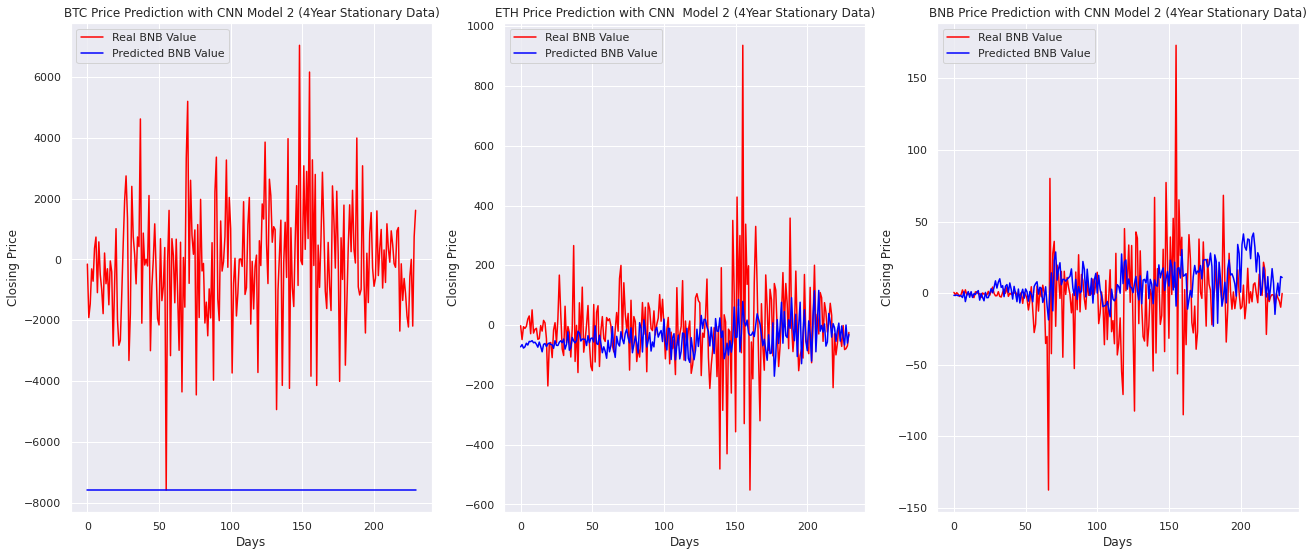

In [ ]:
# Visualise BTC predictions
fig_predcnn = plt.figure(figsize=(22, 9))
plt.subplot(1,3,1)
plt.plot(stat_cnn_y_test_4['BTC'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_cnn_y_hat[:,0], color = 'blue', label = 'Predicted BNB Value')
plt.title('BTC Price Prediction with CNN Model 2 (4Year Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise the ETH price predictions
plt.subplot(1,3,2)
plt.plot(stat_cnn_y_test_4['ETH'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_cnn_y_hat[:,1], color = 'blue', label = 'Predicted BNB Value')
plt.title('ETH Price Prediction with CNN  Model 2 (4Year Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(stat_cnn_y_test_4['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(stat_cnn_y_hat[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with CNN Model 2 (4Year Stationary Data)')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predcnn.savefig('CNN prediction2.png')

**NON-STATIONARY ANALYSES**

**Prediction using LSTM (Section 3 - Non-Stationary)**


**2 YEAR DATASET**

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
tf.random.set_seed(7)
data_set = df['2019-07-01':'2021-07-31'] 
data_set

BTC           ETH          BNB
date                                                
2019-07-01 10624.93000000  295.07000000  33.27770000
2019-07-02 10842.85000000  291.48000000  31.97770000
2019-07-03 11940.00000000  301.14000000  32.52200000
2019-07-04 11145.67000000  282.73000000  33.08880000
2019-07-05 10970.73000000  287.47000000  32.55660000
...                   ...           ...          ...
2021-07-27 39457.87000000 2299.49000000 313.48000000
2021-07-28 40019.56000000 2300.90000000 313.80000000
2021-07-29 40016.48000000 2382.92000000 317.03000000
2021-07-30 42206.37000000 2461.81000000 322.58000000
2021-07-31 41461.83000000 2531.05000000 332.38000000

[762 rows x 3 columns]

In [ ]:
# We want 80% of the data to be used for training, and 20% for testing
n_train_rows1 = int(data_set.shape[0]*.8)-1

# Split into train and test sets but keep all 3 columns
train1 = data_set.iloc[:n_train_rows1, :]
test1 = data_set.iloc[n_train_rows1:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(train1.shape)
print(test1.shape)


(608, 3)
(154, 3)


In [ ]:
# Normalise features
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(train1.values)
test_set_scaled1 = sc1.fit_transform(test1.values)
training_set_scaled1

array([[0.110722, 0.101371, 0.074173],
       [0.114864, 0.099427, 0.070158],
       [0.135719, 0.104657, 0.071839],
       [0.12062 , 0.09469 , 0.073589],
       ...,
       [0.853021, 0.820478, 0.757282],
       [0.803552, 0.743799, 0.696788],
       [0.788405, 0.723682, 0.656037],
       [0.785165, 0.731012, 0.667364]])

In [ ]:
steps = 60

In [ ]:
# Prepare the training data
x_train1 = []
y_train1 = []

for i in range(steps, training_set_scaled1.shape[0]-steps):
    x_train1.append(training_set_scaled1[i-steps:i, :])
    y_train1.append(training_set_scaled1[i, :])

x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
print(x_train1.shape)

(488, 60, 3)


In [ ]:
# Prepare the test data
x_test1 = []
y_test1 = []

for i in range(steps, test_set_scaled1.shape[0]):
    x_test1.append(test_set_scaled1[i-steps:i, :])
    y_test1.append(test_set_scaled1[i, :])

x_test1, y_test1 = np.array(x_test1), np.array(y_test1)
print(x_test1.shape)

(94, 60, 3)


In [ ]:
model_lstm1 = Sequential()

epochs = 300


#Adding the first LSTM layer and Dropout regularisation
model_lstm1.add(LSTM(units = 78, activation = 'tanh',return_sequences = True, input_shape = (x_train1.shape[1], 3)))
model_lstm1.add(Dropout(0.2)) 

# Adding a second LSTM layer and Dropout regularisation
model_lstm1.add(LSTM(units = 78, activation = 'tanh', return_sequences = True))
model_lstm1.add(Dropout(0.2)) 

# Adding a third LSTM layer and Dropout regularisation
model_lstm1.add(LSTM(units = 80, activation = 'tanh'))
model_lstm1.add(Dropout(0.2)) 

# Adding the output layer
model_lstm1.add(Dense(units =3))

#Getting the LSTM Model Summary
model_lstm1.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 78)            25584     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 78)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 78)            48984     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 78)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 80)                50880     
_________________________________________________________________
dropout_10 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
import time
start = time.time()

# simple early stopping
lstm_es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
lstm_mc1 = ModelCheckpoint('lstm1_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Compiling the model
model_lstm1.compile(loss="mae", optimizer="adam", metrics=['accuracy'])

#Fitting the model to the train set and validating using the test set 
lstm1_history = model_lstm1.fit(x_train1, y_train1, batch_size = 32, epochs = 300, validation_data=(x_test1, y_test1), verbose=1, callbacks=[lstm_es1, lstm_mc1])

# loading and saving the best model 
lstm1_saved_model = load_model('lstm1_best_model.h5')
model_lstm1.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("First LSTM Model saved")

#Calculating the time taken to complete the simulation 
end = time.time()
print(f"Total time taken is: {end-start} seconds") 

Epoch 1/300
16/16 [==============================] - 5s 73ms/step - loss: 0.0291 - accuracy: 0.6844 - val_loss: 0.2160 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to lstm1_best_model.h5
Epoch 2/300
16/16 [==============================] - 0s 14ms/step - loss: 0.0161 - accuracy: 0.8135 - val_loss: 0.2054 - val_accuracy: 0.4468

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0147 - accuracy: 0.8402 - val_loss: 0.1748 - val_accuracy: 0.7021

Epoch 00003: val_accuracy improved from 0.50000 to 0.70213, saving model to lstm1_best_model.h5
Epoch 4/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.8730 - val_loss: 0.1746 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.70213
Epoch 5/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0126 - accuracy: 0.9119 - val_loss: 0.1745 - val_accu

In [ ]:
# Evaluate the model on the test data (test loss and test accuracy) using "evaluate"
print('\n# Evaluate on test data')
results = lstm1_saved_model.evaluate(x_test1, y_test1, verbose=0)
print('test loss, test acc:', results)


# Evaluate on test data
test loss, test acc: [0.17372901737689972, 0.7978723645210266]


In [ ]:
# Evaluate the model on the train data (train loss and train accuracy) using "evaluate"
print('\n# Evaluate on train data')
results = lstm1_saved_model.evaluate(x_train1, y_train1, verbose=0)
print('train loss, train acc:', results)


# Evaluate on train data
train loss, train acc: [0.0043152994476258755, 0.9795082211494446]


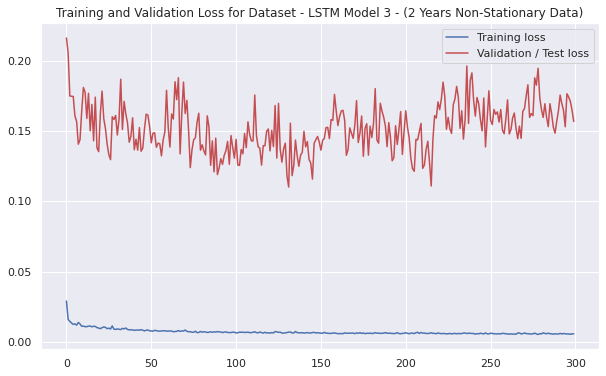

In [ ]:
#checking for training and validation loss
loss1 = lstm1_history.history['loss']
val_loss1 = lstm1_history.history['val_loss']
epochs1 = range(len(loss1))
plt.figure()
plt.plot(epochs1, (loss1), 'b', label='Training loss')
plt.plot(epochs1, (val_loss1), 'r', label='Validation / Test loss')
plt.title("Training and Validation Loss for Dataset - LSTM Model 3 - (2 Years Non-Stationary Data)")
plt.legend()
plt.show()
# trainplot1.savefig('train/testloss-lstm1.png')

In [ ]:
# Predict values from test data trained using training data
y_hat1 = lstm1_saved_model.predict(x_test1)
y_hat1 = sc1.inverse_transform(y_hat1)
y_hat1


# df_predict = pd.DataFrame({'BTC': df['BTC'],
#                            'ETH': df['ETH'],
#                            'BNB': df['BNB'],
#                            'BTC_predicted': y_hat[:,0],
#                            'ETH_predicted': y_hat[:,1],
#                            #'BNB_predicted': y_hat[:,2]
#                            })

array([[65006.5    ,  3661.8892 ,   341.9035 ],
       [64849.914  ,  3729.6382 ,   347.68463],
       [66159.52   ,  3869.214  ,   352.01767],
       [66630.77   ,  3912.2654 ,   353.3085 ],
       ...,
       [38102.234  ,  2414.075  ,   308.46628],
       [39205.207  ,  2414.331  ,   304.114  ],
       [40206.59   ,  2439.732  ,   302.05685],
       [41907.24   ,  2530.0598 ,   302.2575 ]], dtype=float32)

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
preds1 = lstm1_saved_model.predict(x_test1).squeeze()
mae1 = mean_absolute_error(preds1, y_test1)
print('MAE: %f' % mae1)

MAE: 0.173729


In [ ]:
#Performing an inverse transform on test and predictions sets for MAPE Evaluation
new_y_test1= sc1.inverse_transform(y_test1)
new_preds1 = sc1.inverse_transform(preds1)

In [ ]:
#Defining MAPE function
def MAPE(y_test1,preds1):
    mape = np.mean(np.abs((y_test1 - preds1)/y_test1))*100
    return mape
MAPE(new_y_test1,new_preds1)

16.730741658832144

In [ ]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
preds2 = lstm1_saved_model.predict(x_test1).squeeze()
mse2 = mean_squared_error(preds2, y_test1)
print('MSE: %f' % mse2)

MSE: 0.063458


In [ ]:
#Root Mean Squared Error
from math import sqrt
rmse1 = sqrt(mse2)
print('RMSE: %f' % rmse1)

RMSE: 0.251909


In [ ]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(y_test1, preds1)
stat_r_squared

-0.15885281141035426

In [ ]:
lstm_y_test1 = test1[steps:].reset_index()
lstm_y_test1

date            BTC           ETH          BNB
0  2021-04-29 53555.00000000 2757.04000000 599.70000000
1  2021-04-30 57694.27000000 2772.42000000 622.65000000
2  2021-05-01 57800.37000000 2944.77000000 620.00000000
3  2021-05-02 56578.21000000 2949.56000000 621.78000000
4  2021-05-03 57169.39000000 3431.04000000 676.15000000
..        ...            ...           ...          ...
89 2021-07-27 39457.87000000 2299.49000000 313.48000000
90 2021-07-28 40019.56000000 2300.90000000 313.80000000
91 2021-07-29 40016.48000000 2382.92000000 317.03000000
92 2021-07-30 42206.37000000 2461.81000000 322.58000000
93 2021-07-31 41461.83000000 2531.05000000 332.38000000

[94 rows x 4 columns]

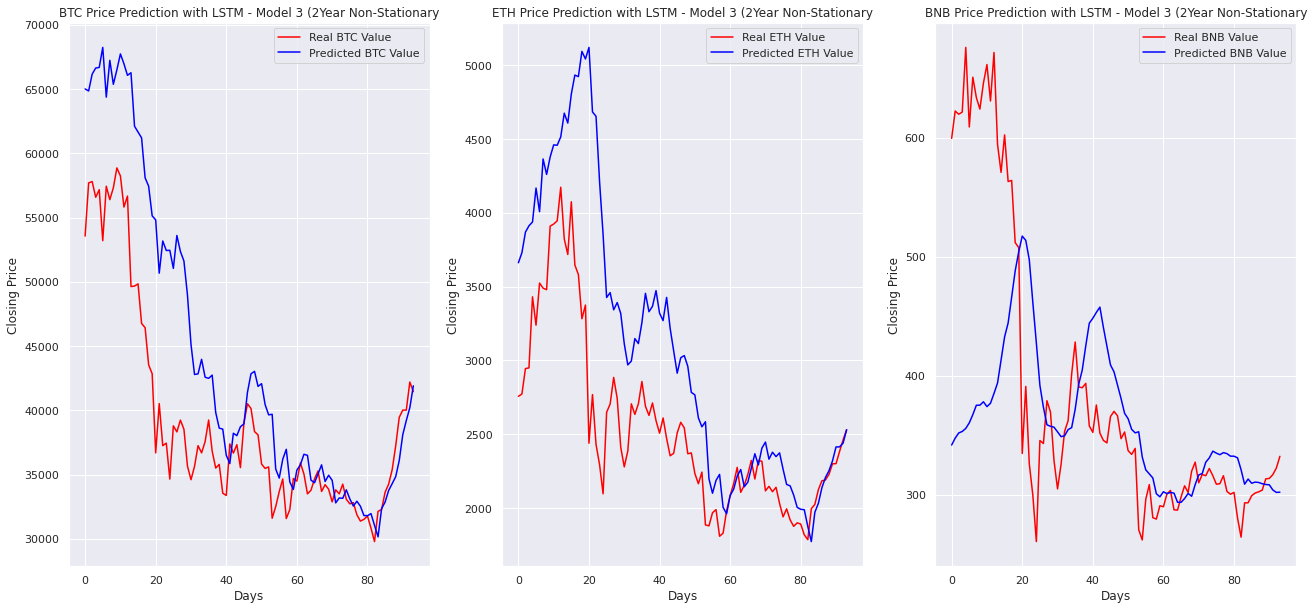

In [ ]:
# Visualise BTC predictions
fig_predlstm = plt.figure(figsize=(22, 10))
plt.subplot(1,3,1)
plt.plot(lstm_y_test1['BTC'], color = 'red', label = 'Real BTC Value')
plt.plot(y_hat1[:,0], color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Price Prediction with LSTM - Model 3 (2Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise ETH predictions
plt.subplot(1,3,2)
plt.plot(lstm_y_test1['ETH'], color = 'red', label = 'Real ETH Value')
plt.plot(y_hat1[:,1], color = 'blue', label = 'Predicted ETH Value')
plt.title('ETH Price Prediction with LSTM - Model 3 (2Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(lstm_y_test1['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(y_hat1[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with LSTM - Model 3 (2Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predlstm.savefig('RNN-LSTM prediction3.png')

PREDICTION USING CNN (SECTION 1)

In [ ]:
import time 
start = time.time()

cnn1_model = Sequential()

#Adding the Convolutional layer and Dropout regularisation
cnn1_model.add(Conv1D(78,3, strides=3,input_shape=(x_train1.shape[1], 3)))
cnn1_model.add(Activation('relu'))
cnn1_model.add(Dropout(0.2)) 

#Adding the Pooling Layer - Max Pooling
cnn1_model.add(MaxPooling1D(pool_size=2))

# Adding the fully connected / dense layer
cnn1_model.add(Flatten())
cnn1_model.add(Dense(32))

# Adding the output layer
cnn1_model.add(Dense(3, activation='relu'))

# simple early stopping
cnn1_es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
cnn1_mc1 = ModelCheckpoint('cnn1_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Compiling the model
cnn1_model.compile(loss='mae',
                  optimizer= 'adam',
                  metrics=['accuracy'])

#Fitting the model to the train set and validating using the test set 
cnn1_history = cnn1_model.fit(x_train1, y_train1, batch_size=32, epochs=300, verbose=1, validation_data=(x_test1, y_test1), callbacks=[cnn1_es1, cnn1_mc1])

# loading and saving the best model
cnn1_saved_model = load_model('cnn1_best_model.h5')

#Calculating the time taken to complete the simulation
end = time.time()
print(f"Total time taken is: {end-start} seconds") 

Epoch 1/300
16/16 [==============================] - 1s 11ms/step - loss: 0.0531 - accuracy: 0.1865 - val_loss: 0.2316 - val_accuracy: 0.6596

Epoch 00001: val_accuracy improved from -inf to 0.65957, saving model to cnn1_best_model.h5
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 0.1906 - val_loss: 0.2372 - val_accuracy: 0.7766

Epoch 00002: val_accuracy improved from 0.65957 to 0.77660, saving model to cnn1_best_model.h5
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.1906 - val_loss: 0.2308 - val_accuracy: 0.8085

Epoch 00003: val_accuracy improved from 0.77660 to 0.80851, saving model to cnn1_best_model.h5
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.1906 - val_loss: 0.2115 - val_accuracy: 0.6596

Epoch 00004: val_accuracy did not improve from 0.80851
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0421 - accuracy: 0.

In [ ]:
#Evaluate the model on the test data (test loss and test accuracy) using "evaluate"
cnn1_score = cnn1_saved_model.evaluate(x_test1, y_test1, verbose=0)
print('Test loss:', cnn1_score[0])
print('Test accuracy:', cnn1_score[1])

Test loss: 0.20899145305156708
Test accuracy: 0.8617021441459656


In [ ]:
# Evaluate the model on the train data (train loss and train accuracy) using "evaluate"
print('\n# Evaluate on train data')
the_cnnresults = cnn1_saved_model.evaluate(x_train1, y_train1, verbose=0)
print('train loss, train acc:', the_cnnresults)


# Evaluate on train data
train loss, train acc: [0.04027358070015907, 0.1905737668275833]


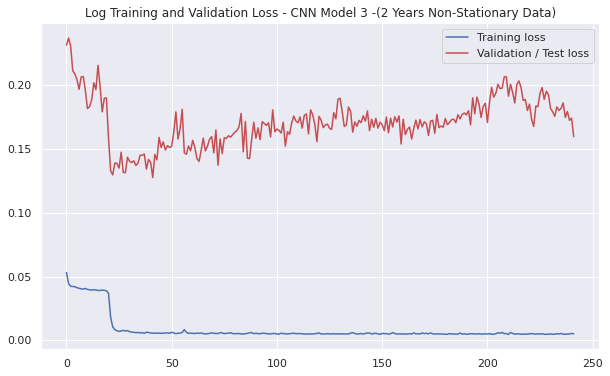

In [ ]:
#checking for training and validation loss
cnn1_loss = cnn1_history.history['loss']
cnn1_val_loss = cnn1_history.history['val_loss']
cnn1_epochs = range(len(cnn1_loss))
plt.figure()
plt.plot(cnn1_epochs, (cnn1_loss), 'b', label='Training loss')
plt.plot(cnn1_epochs, (cnn1_val_loss), 'r', label='Validation / Test loss')
plt.title("Log Training and Validation Loss - CNN Model 3 -(2 Years Non-Stationary Data)")
plt.legend()
plt.show()
# plt.savefig('train/testloss-cnn3.png')

In [ ]:
# Predict values from test data trained using training data
cnn1_y_hat = cnn1_saved_model.predict(x_test1)
cnn1_y_hat = sc1.inverse_transform(cnn1_y_hat)
cnn1_y_hat

array([[29790.35   ,  2151.9421 ,   343.37473],
       [29790.35   ,  2111.913  ,   343.22992],
       [29790.35   ,  2122.1829 ,   350.67178],
       [29790.35   ,  2170.3347 ,   362.48605],
       ...,
       [29790.35   ,  2043.7764 ,   287.04242],
       [29790.35   ,  2124.0955 ,   284.23013],
       [29790.35   ,  2165.8145 ,   289.99002],
       [29790.35   ,  2175.6    ,   295.8649 ]], dtype=float32)

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
cnn1_preds1 = cnn1_saved_model.predict(x_test1).squeeze()
cnn1_mae1 = mean_absolute_error(cnn1_preds1, y_test1)
print('MAE: %f' % cnn1_mae1)

MAE: 0.208991


In [ ]:
new_cnn1_preds1 = sc1.inverse_transform(cnn1_preds1)

In [ ]:
#Defining MAPE function
def MAPE(y_test1,cnn1_preds1):
    mape = np.mean(np.abs((y_test1 - cnn1_preds1)/y_test1))*100
    return mape
MAPE(new_y_test1,new_cnn1_preds1)

18.6525750127921

In [ ]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
cnn1_preds2 = cnn1_saved_model.predict(x_test1).squeeze()
cnn1_mse2 = mean_squared_error(cnn1_preds2, y_test1)
print('MSE: %f' % cnn1_mse2)

MSE: 0.083390


In [ ]:
#Root Mean Squared Error
from math import sqrt
cnn1_rmse1 = sqrt(cnn1_mse2)
print('RMSE: %f' % cnn1_rmse1)

RMSE: 0.288774


In [ ]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(y_test1, cnn1_preds1)
stat_r_squared

-0.45838821611696007

In [ ]:
cnn1_y_test = test1[steps:].reset_index()
cnn1_y_test

date            BTC           ETH          BNB
0  2021-04-29 53555.00000000 2757.04000000 599.70000000
1  2021-04-30 57694.27000000 2772.42000000 622.65000000
2  2021-05-01 57800.37000000 2944.77000000 620.00000000
3  2021-05-02 56578.21000000 2949.56000000 621.78000000
4  2021-05-03 57169.39000000 3431.04000000 676.15000000
..        ...            ...           ...          ...
89 2021-07-27 39457.87000000 2299.49000000 313.48000000
90 2021-07-28 40019.56000000 2300.90000000 313.80000000
91 2021-07-29 40016.48000000 2382.92000000 317.03000000
92 2021-07-30 42206.37000000 2461.81000000 322.58000000
93 2021-07-31 41461.83000000 2531.05000000 332.38000000

[94 rows x 4 columns]

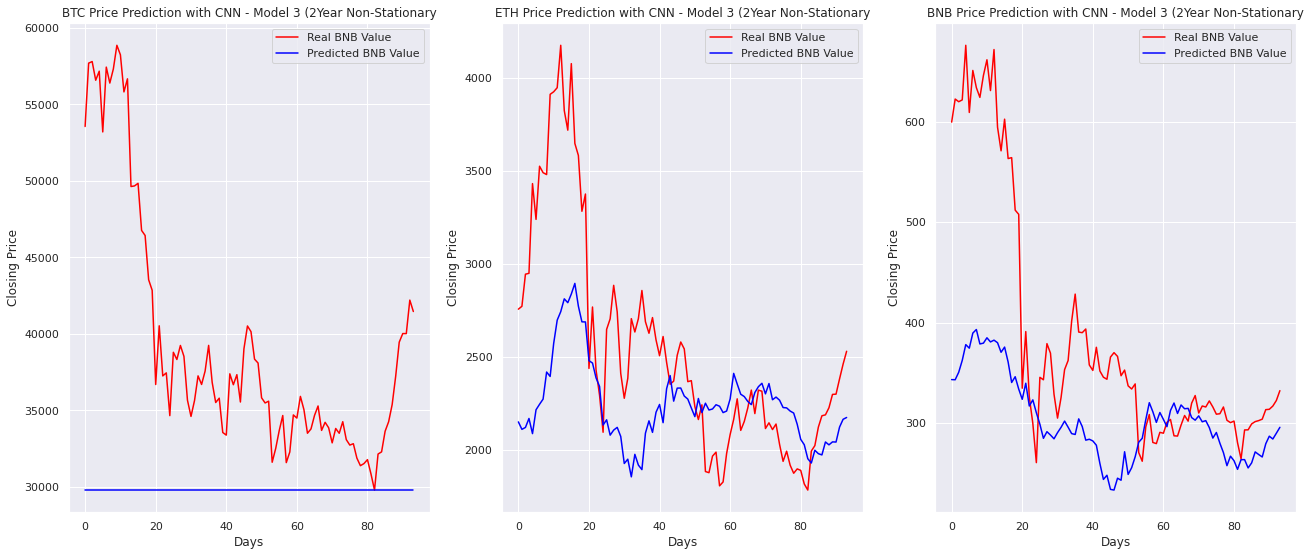

In [ ]:
# Visualise BTC predictions
fig_predcnn1 = plt.figure(figsize=(22, 9))
plt.subplot(1,3,1)
plt.plot(cnn1_y_test['BTC'], color = 'red', label = 'Real BNB Value')
plt.plot(cnn1_y_hat[:,0], color = 'blue', label = 'Predicted BNB Value')
plt.title('BTC Price Prediction with CNN - Model 3 (2Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise the ETH price predictions
plt.subplot(1,3,2)
plt.plot(cnn1_y_test['ETH'], color = 'red', label = 'Real BNB Value')
plt.plot(cnn1_y_hat[:,1], color = 'blue', label = 'Predicted BNB Value')
plt.title('ETH Price Prediction with CNN - Model 3 (2Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(cnn1_y_test['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(cnn1_y_hat[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with CNN - Model 3 (2Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predcnn1.savefig('CNN prediction3.png')

**4YEAR NON-STATIONARY DATASET**



**Prediction using RNN-LSTM (Section 2) - 4 Year Non-Stationary**



In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
tf.random.set_seed(7) #freezes the random parameters
dataset = df
dataset


BTC           ETH          BNB
date                                                
2017-08-17  4285.08000000  302.00000000  17.83440000
2017-08-18  4108.37000000  293.96000000  17.83440000
2017-08-19  4139.98000000  290.91000000  17.83440000
2017-08-20  4086.29000000  299.10000000  17.83440000
2017-08-21  4016.00000000  323.29000000  17.83440000
...                   ...           ...          ...
2021-07-27 39457.87000000 2299.49000000 313.48000000
2021-07-28 40019.56000000 2300.90000000 313.80000000
2021-07-29 40016.48000000 2382.92000000 317.03000000
2021-07-30 42206.37000000 2461.81000000 322.58000000
2021-07-31 41461.83000000 2531.05000000 332.38000000

[1445 rows x 3 columns]

In [ ]:
# We want 80% of the data to be used for training, and 20% for testing
n_train_rows = int(dataset.shape[0]*.8)-1

# Split into train and test sets but keep all 3 columns
train = dataset.iloc[:n_train_rows, :]
test = dataset.iloc[n_train_rows:, :]

# The total rows of the two datasets should equal the total amount of rows in your CSV
print(train.shape)
print(test.shape)


(1155, 3)
(290, 3)


In [ ]:
train

BTC          ETH         BNB
date                                              
2017-08-17  4285.08000000 302.00000000 17.83440000
2017-08-18  4108.37000000 293.96000000 17.83440000
2017-08-19  4139.98000000 290.91000000 17.83440000
2017-08-20  4086.29000000 299.10000000 17.83440000
2017-08-21  4016.00000000 323.29000000 17.83440000
...                   ...          ...         ...
2020-10-10 11293.22000000 370.52000000 28.44140000
2020-10-11 11369.02000000 374.16000000 28.52710000
2020-10-12 11528.25000000 386.51000000 30.65030000
2020-10-13 11420.56000000 381.04000000 30.72560000
2020-10-14 11417.89000000 378.69000000 30.83800000

[1155 rows x 3 columns]

In [ ]:
test

BTC           ETH          BNB
date                                                
2020-10-15 11505.12000000  377.64000000  31.32560000
2020-10-16 11319.32000000  365.50000000  30.05160000
2020-10-17 11360.20000000  368.32000000  30.24140000
2020-10-18 11503.14000000  378.11000000  30.65930000
2020-10-19 11751.47000000  379.30000000  29.91070000
...                   ...           ...          ...
2021-07-27 39457.87000000 2299.49000000 313.48000000
2021-07-28 40019.56000000 2300.90000000 313.80000000
2021-07-29 40016.48000000 2382.92000000 317.03000000
2021-07-30 42206.37000000 2461.81000000 322.58000000
2021-07-31 41461.83000000 2531.05000000 332.38000000

[290 rows x 3 columns]

In [ ]:
# Normalise features
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train.values)
test_set_scaled = sc.fit_transform(test.values)

In [ ]:
training_set_scaled

array([[0.068876, 0.167329, 0.393865],
       [0.057771, 0.161164, 0.393865],
       [0.059758, 0.158826, 0.393865],
       [0.056384, 0.165105, 0.393865],
       ...,
       [0.514024, 0.222655, 0.704831],
       [0.52403 , 0.232124, 0.766578],
       [0.517263, 0.22793 , 0.768768],
       [0.517095, 0.226128, 0.772037]])

In [ ]:
steps = 60

In [ ]:
# Prepare the training data
x_train = []
y_train = []

# Creating a data structure with 60 time-steps
for i in range(steps, training_set_scaled.shape[0]-steps):
    x_train.append(training_set_scaled[i-steps:i, :])
    y_train.append(training_set_scaled[i, :])

#We have now reshaped the data into the following format (#values, #time-steps, #3 dimensional output).
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(1035, 60, 3)


In [ ]:
# Prepare the test data
x_test = []
y_test = []

for i in range(steps, test_set_scaled.shape[0]):
    x_test.append(test_set_scaled[i-steps:i, :])
    y_test.append(test_set_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(230, 60, 3)


In [ ]:
y_test

array([[0.15221 , 0.057981, 0.004882],
       [0.155143, 0.058598, 0.004068],
       [0.191677, 0.071345, 0.005689],
       [0.219648, 0.072795, 0.005178],
       ...,
       [0.549227, 0.508252, 0.441926],
       [0.549168, 0.529792, 0.4469  ],
       [0.591075, 0.550509, 0.455448],
       [0.576827, 0.568692, 0.470542]])

In [ ]:
model = Sequential()

epochs = 300


#Adding the first LSTM layer and Dropout regularisation
model.add(LSTM(units = 78, activation = 'tanh',return_sequences = True, input_shape = (x_train.shape[1], 3)))
model.add(Dropout(0.2)) 

# Adding a second LSTM layer and Dropout regularisation
model.add(LSTM(units = 78, activation = 'tanh', return_sequences = True))
model.add(Dropout(0.2)) 

# Adding a third LSTM layer and Dropout regularisation
model.add(LSTM(units = 80, activation = 'tanh'))
model.add(Dropout(0.2)) 

# Adding the output layer
model.add(Dense(units =3))

#Getting the LSTM Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 78)            25584     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 78)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 78)            48984     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 78)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 80)                50880     
_________________________________________________________________
dropout_14 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [ ]:
import time 
start = time.time()

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras import backend as K


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



# Compiling the model 
model.compile(loss="mae", optimizer="adam", metrics=['accuracy'])

#Fitting the model to the train test and validating using the test set
history = model.fit(x_train, y_train, batch_size = 32, epochs = 300, validation_data=(x_test, y_test), verbose=1, callbacks=[es, mc])

# loading and saving the best model
saved_model = load_model('best_model.h5')
model.save("multiple_features_"+str(steps)+"_steps_"+str(epochs)+"_epochs.h5")
print("Model saved")

#Calculating time taken to complete the simulation 
end = time.time()
print(f"Total time taken is: {end-start} seconds") 


Epoch 1/300
33/33 [==============================] - 5s 41ms/step - loss: 0.0899 - accuracy: 0.6754 - val_loss: 0.1127 - val_accuracy: 0.6304

Epoch 00001: val_accuracy improved from -inf to 0.63043, saving model to best_model.h5
Epoch 2/300
33/33 [==============================] - 0s 12ms/step - loss: 0.0556 - accuracy: 0.7807 - val_loss: 0.1009 - val_accuracy: 0.7478

Epoch 00002: val_accuracy improved from 0.63043 to 0.74783, saving model to best_model.h5
Epoch 3/300
33/33 [==============================] - 0s 13ms/step - loss: 0.0519 - accuracy: 0.7971 - val_loss: 0.0895 - val_accuracy: 0.8304

Epoch 00003: val_accuracy improved from 0.74783 to 0.83043, saving model to best_model.h5
Epoch 4/300
33/33 [==============================] - 0s 12ms/step - loss: 0.0498 - accuracy: 0.8329 - val_loss: 0.1046 - val_accuracy: 0.8043

Epoch 00004: val_accuracy did not improve from 0.83043
Epoch 5/300
33/33 [==============================] - 0s 13ms/step - loss: 0.0479 - accuracy: 0.8348 - val_

In [ ]:
# Evaluate the model on the test data (test loss and test accuracy) using "evaluate"
print('\n# Evaluate on test data')
results = saved_model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


# Evaluate on test data
test loss, test acc: [0.0356951579451561, 0.926086962223053]


In [ ]:
# Evaluate the model on the train data (train loss and train accuracy) using "evaluate"
print('\n# Evaluate on train data')
results = saved_model.evaluate(x_train, y_train, verbose=0)
print('train loss, train acc:', results)


# Evaluate on train data
train loss, train acc: [0.016588499769568443, 0.9362319111824036]


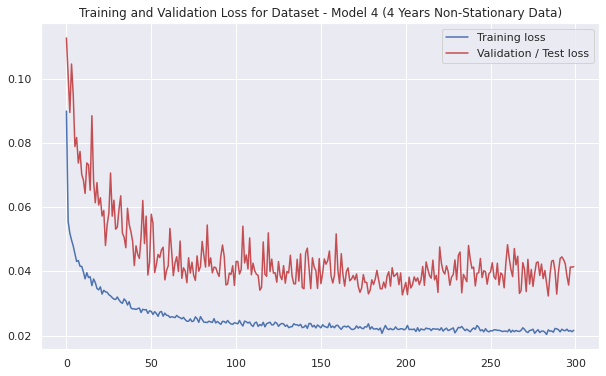

In [ ]:
#checking for training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, (loss), 'b', label='Training loss')
plt.plot(epochs, (val_loss), 'r', label='Validation / Test loss')
plt.title("Training and Validation Loss for Dataset - Model 4 (4 Years Non-Stationary Data)")
plt.legend()
plt.show()
# plt.savefig('train/testloss-lstm3.png')

In [ ]:
# Predict values from test data trained using training data
y_hat = saved_model.predict(x_test)
y_hat = sc.inverse_transform(y_hat)
y_hat


# df_predict = pd.DataFrame({'BTC': df['BTC'],
#                            'ETH': df['ETH'],
#                            'BNB': df['BNB'],
#                            'BTC_predicted': y_hat[:,0],
#                            'ETH_predicted': y_hat[:,1],
#                            #'BNB_predicted': y_hat[:,2]
#                            })

array([[1.950155e+04, 6.079600e+02, 3.464693e+01],
       [1.972267e+04, 6.157178e+02, 3.500946e+01],
       [1.980347e+04, 6.178965e+02, 3.417006e+01],
       [2.109362e+04, 6.528307e+02, 3.744847e+01],
       ...,
       [3.780658e+04, 2.214767e+03, 2.981028e+02],
       [3.825883e+04, 2.225450e+03, 2.977513e+02],
       [3.859549e+04, 2.282565e+03, 3.017940e+02],
       [4.035316e+04, 2.365845e+03, 3.063580e+02]], dtype=float32)

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
preds = saved_model.predict(x_test).squeeze()
mae = mean_absolute_error(preds, y_test)
print('MAE: %f' % mae)

MAE: 0.035695


In [ ]:
#Taking an inverse transform of the predicted value for MAPE evaluation
new_y_test = sc.inverse_transform(y_test)
new_preds = sc.inverse_transform(preds)

In [ ]:
#Defining MAPE function
def MAPE(y_test,preds):
    mape = np.mean(np.abs((y_test - preds)/y_test))*100
    return mape
MAPE(new_y_test,new_preds)

7.142091600252479

In [ ]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
preds = saved_model.predict(x_test).squeeze()
mse = mean_squared_error(preds, y_test)
print('MSE: %f' % mse)

MSE: 0.002633


In [ ]:
#Root Mean Squared Error
from math import sqrt
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.051313


In [ ]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(y_test, preds)
stat_r_squared

0.9477721886590885

In [ ]:
#Test data
lstm2_y_test1 = test[steps:].reset_index()
lstm2_y_test1 

date            BTC           ETH          BNB
0   2020-12-14 19273.14000000  586.29000000  30.03380000
1   2020-12-15 19426.43000000  588.64000000  29.50530000
2   2020-12-16 21335.52000000  637.18000000  30.55770000
3   2020-12-17 22797.16000000  642.70000000  30.22550000
4   2020-12-18 23107.39000000  653.85000000  30.98820000
..         ...            ...           ...          ...
225 2021-07-27 39457.87000000 2299.49000000 313.48000000
226 2021-07-28 40019.56000000 2300.90000000 313.80000000
227 2021-07-29 40016.48000000 2382.92000000 317.03000000
228 2021-07-30 42206.37000000 2461.81000000 322.58000000
229 2021-07-31 41461.83000000 2531.05000000 332.38000000

[230 rows x 4 columns]

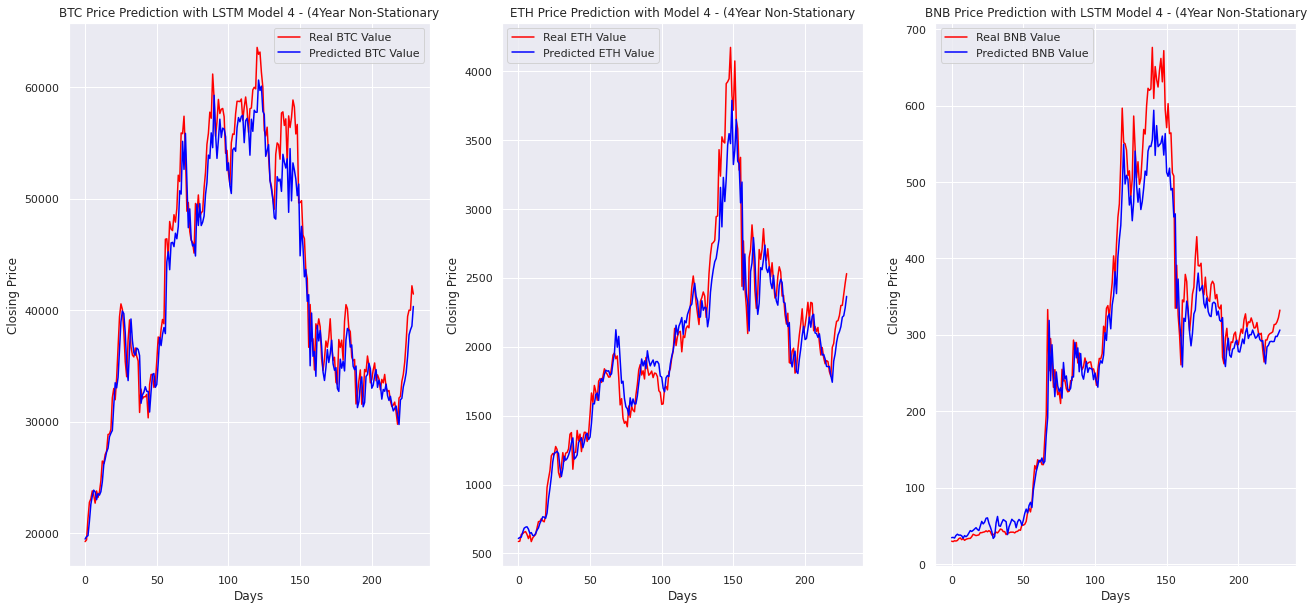

In [ ]:
# Visualise BTC predictions
fig_predlstm = plt.figure(figsize=(22, 10))
plt.subplot(1,3,1)
plt.plot(lstm2_y_test1['BTC'], color = 'red', label = 'Real BTC Value')
plt.plot(y_hat[:,0], color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Price Prediction with LSTM Model 4 - (4Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise ETH predictions
plt.subplot(1,3,2)
plt.plot(lstm2_y_test1['ETH'], color = 'red', label = 'Real ETH Value')
plt.plot(y_hat[:,1], color = 'blue', label = 'Predicted ETH Value')
plt.title('ETH Price Prediction with Model 4 - (4Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# # plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(lstm2_y_test1['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(y_hat[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with LSTM Model 4 - (4Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predlstm.savefig('RNN-LSTM 4.png')

**CNN MODEL 4**


In [ ]:
import time 
start = time.time()

cnn_model = Sequential()

#Adding the Convolutional layer and Dropout regularisation
cnn_model.add(Conv1D(78,3, strides=3,input_shape=(x_train.shape[1], 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2)) 

#Adding the Pooling Layer - Max Pooling
cnn_model.add(MaxPooling1D(pool_size=2))

# Adding the fully connected / dense layer
cnn_model.add(Flatten())
cnn_model.add(Dense(32))

# Adding the output layer
cnn_model.add(Dense(3, activation='relu'))

# simple early stopping
es1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc1 = ModelCheckpoint('cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

#Compiling the model
cnn_model.compile(loss='mae',
                  optimizer= 'adam',
                  metrics=['accuracy'])

#Fitting the modfel to the train set and validating using the test set
cnn_history = cnn_model.fit(x_train, y_train, batch_size=32, epochs=300, verbose=1, validation_data=(x_test, y_test), callbacks=[es1, mc1])


# loading and saving the best model 
cnn_saved_model = load_model('cnn_best_model.h5')


#Calculating time taken to complete the simulation 
end = time.time()
print(f"Total time taken is: {end-start} seconds") 

Epoch 1/300
33/33 [==============================] - 1s 7ms/step - loss: 0.1529 - accuracy: 0.6831 - val_loss: 0.2720 - val_accuracy: 0.3174

Epoch 00001: val_accuracy improved from -inf to 0.31739, saving model to cnn_best_model.h5
Epoch 2/300
33/33 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.6957 - val_loss: 0.2612 - val_accuracy: 0.2391

Epoch 00002: val_accuracy did not improve from 0.31739
Epoch 3/300
33/33 [==============================] - 0s 4ms/step - loss: 0.1260 - accuracy: 0.6976 - val_loss: 0.2624 - val_accuracy: 0.2783

Epoch 00003: val_accuracy did not improve from 0.31739
Epoch 4/300
33/33 [==============================] - 0s 4ms/step - loss: 0.1230 - accuracy: 0.7005 - val_loss: 0.2554 - val_accuracy: 0.3087

Epoch 00004: val_accuracy did not improve from 0.31739
Epoch 5/300
33/33 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.7072 - val_loss: 0.2632 - val_accuracy: 0.3130

Epoch 00005: val_accuracy did not 

In [ ]:
# Evaluating the model on train data (test loss and test accuarcy) using "evaluate"
cnn_score = cnn_saved_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', cnn_score[0])
print('Test accuracy:', cnn_score[1])

Test loss: 0.08226694911718369
Test accuracy: 0.908695638179779


In [ ]:
# Evaluating the model on the train data (train loss and treain accuracy using "evaluate"
print('\n# Evaluate on train data')
cnn_results = cnn_saved_model.evaluate(x_train, y_train, verbose=0)
print('train loss, train acc:', cnn_results)


# Evaluate on train data
train loss, train acc: [0.02345162071287632, 0.9285024404525757]


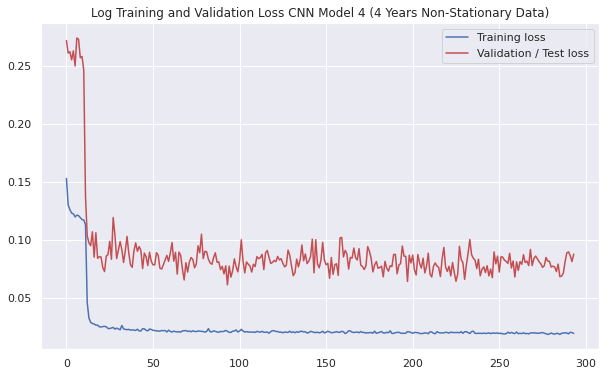

In [ ]:
#checking for training and validation loss
cnn_loss = cnn_history.history['loss']
cnn_val_loss = cnn_history.history['val_loss']
cnn_epochs = range(len(cnn_loss))
plt.figure()
plt.plot(cnn_epochs, (cnn_loss), 'b', label='Training loss')
plt.plot(cnn_epochs, (cnn_val_loss), 'r', label='Validation / Test loss')
plt.title("Log Training and Validation Loss CNN Model 4 (4 Years Non-Stationary Data)")
plt.legend()
plt.show()
# plt.savefig('train/testloss-cnn2.png')

In [ ]:
# Predict values from test data trained using training data
cnn_y_hat = cnn_saved_model.predict(x_test)
cnn_y_hat = sc.inverse_transform(cnn_y_hat)
cnn_y_hat

array([[16719.617   ,   559.5996  ,    40.977367],
       [16592.656   ,   543.9248  ,    36.685593],
       [16909.605   ,   558.46985 ,    39.275665],
       [18042.744   ,   587.7178  ,    42.81902 ],
       ...,
       [34004.547   ,  1999.1362  ,   271.87415 ],
       [33981.12    ,  2001.8068  ,   268.75784 ],
       [34622.91    ,  2034.9489  ,   269.05078 ],
       [36134.97    ,  2102.409   ,   279.8789  ]], dtype=float32)

In [ ]:
#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error
cnn_preds1 = cnn_saved_model.predict(x_test).squeeze()
cnn_mae1 = mean_absolute_error(cnn_preds1, y_test)
print('MAE: %f' % cnn_mae1)

MAE: 0.082267


In [ ]:
#Inverse transforming the predicted values for MAPE evaluation
new_cnn_preds1 = sc.inverse_transform(cnn_preds1)

In [ ]:
#Defining MAPE function
def MAPE(y_test,cnn_preds1):
    mape = np.mean(np.abs((y_test - cnn_preds1)/y_test))*100
    return mape
MAPE(new_y_test,new_cnn_preds1)

15.504409299023333

In [ ]:
#Mean Square Error 
from sklearn.metrics import mean_squared_error
cnn_preds2 = cnn_saved_model.predict(x_test).squeeze()
cnn_mse2 = mean_squared_error(cnn_preds2, y_test)
print('MSE: %f' % cnn_mse2)

MSE: 0.010517


In [ ]:
#Root Mean Squared Error
from math import sqrt
cnn_rmse1 = sqrt(cnn_mse2)
print('RMSE: %f' % cnn_rmse1)

RMSE: 0.102552


In [ ]:
#R2 
from sklearn.metrics import r2_score
stat_r_squared = r2_score(y_test,cnn_preds1)
stat_r_squared

0.7920767738474804

In [ ]:
#Test data 
cnn_y_test = test[steps:].reset_index()
cnn_y_test

date            BTC           ETH          BNB
0   2020-12-14 19273.14000000  586.29000000  30.03380000
1   2020-12-15 19426.43000000  588.64000000  29.50530000
2   2020-12-16 21335.52000000  637.18000000  30.55770000
3   2020-12-17 22797.16000000  642.70000000  30.22550000
4   2020-12-18 23107.39000000  653.85000000  30.98820000
..         ...            ...           ...          ...
225 2021-07-27 39457.87000000 2299.49000000 313.48000000
226 2021-07-28 40019.56000000 2300.90000000 313.80000000
227 2021-07-29 40016.48000000 2382.92000000 317.03000000
228 2021-07-30 42206.37000000 2461.81000000 322.58000000
229 2021-07-31 41461.83000000 2531.05000000 332.38000000

[230 rows x 4 columns]

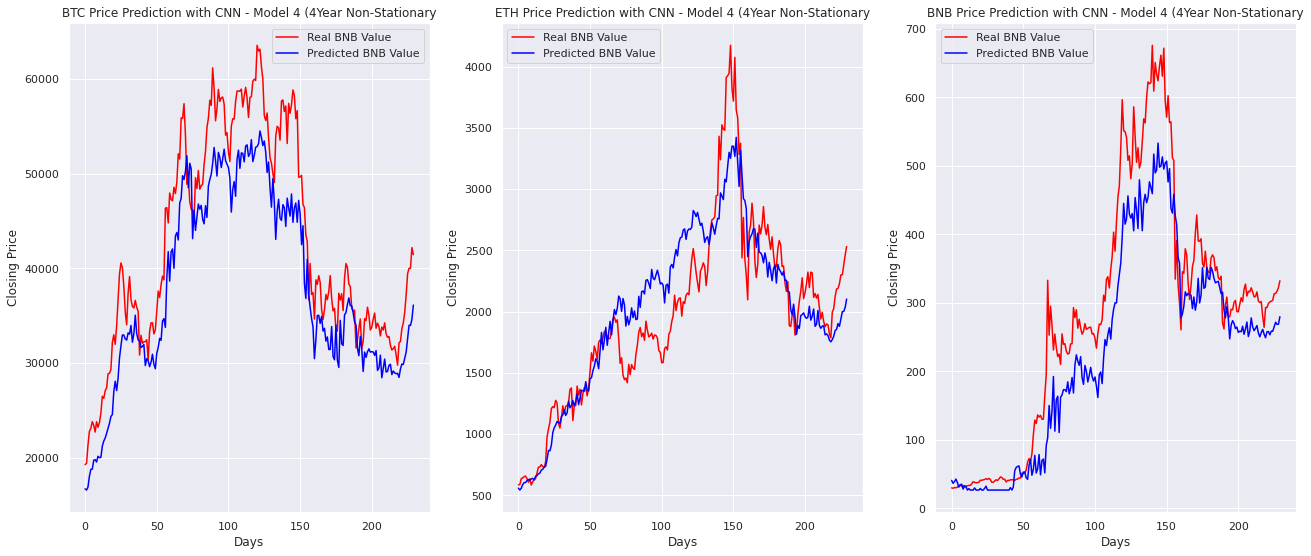

In [ ]:
# Visualise BTC predictions
fig_predcnn = plt.figure(figsize=(22, 9))
plt.subplot(1,3,1)
plt.plot(cnn_y_test['BTC'], color = 'red', label = 'Real BNB Value')
plt.plot(cnn_y_hat[:,0], color = 'blue', label = 'Predicted BNB Value')
plt.title('BTC Price Prediction with CNN - Model 4 (4Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise the ETH price predictions
plt.subplot(1,3,2)
plt.plot(cnn_y_test['ETH'], color = 'red', label = 'Real BNB Value')
plt.plot(cnn_y_hat[:,1], color = 'blue', label = 'Predicted BNB Value')
plt.title('ETH Price Prediction with CNN - Model 4 (4Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
# plt.show()

# Visualise BNB predictions
plt.subplot(1,3,3)
plt.plot(cnn_y_test['BNB'], color = 'red', label = 'Real BNB Value')
plt.plot(cnn_y_hat[:,2], color = 'blue', label = 'Predicted BNB Value')
plt.title('BNB Price Prediction with CNN - Model 4 (4Year Non-Stationary')
plt.ylabel('Closing Price')
plt.xlabel('Days')
plt.legend()
plt.show()
fig_predcnn.savefig('CNN prediction4.png')